In [2]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2022-07-27 08:19:59


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from time import time
import seaborn as sns

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

# Data concat

## Before Data

In [1]:
import glob
import os
import os.path as osp

path = osp.join(osp.dirname(osp.realpath("__file__")))
path

'/home/jovyan/work/Documents/CASA/modules/diss'

In [5]:
before_path = osp.join(osp.dirname(osp.realpath("__file__")),'data','before') # Before Path
all_before_files = glob.glob(before_path + "/*.csv")

li = []

for filename in all_before_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

before_frame = pd.concat(li, axis=0, ignore_index=True)

In [6]:
before_frame['Start Date'] = pd.to_datetime(before_frame['Start Date'], format="%d/%m/%Y %H:%M")

before_frame['End Date'] = pd.to_datetime(before_frame['End Date'], format="%d/%m/%Y %H:%M")
before_frame

filtered_b_frame = before_frame.loc[(before_frame['Start Date'] > '2019-10-14 23:59')
                     & (before_frame['Start Date'] < '2019-11-16 00:00')]
filtered_b_frame

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
5,92172956,720,4695,2019-10-15 18:39:00,228,"St. James's Square, St. James's",2019-10-15 18:27:00,303,"Albert Gate, Hyde Park"
6,92170239,420,10201,2019-10-15 18:00:00,40,"Commercial Street, Shoreditch",2019-10-15 17:53:00,446,"York Hall, Bethnal Green"
18,92165068,1200,14893,2019-10-15 16:50:00,553,"Regent's Row , Haggerston",2019-10-15 16:30:00,806,"Handyside Street, King's Cross"
20,92178745,660,11549,2019-10-15 21:49:00,374,"Waterloo Station 1, Waterloo",2019-10-15 21:38:00,341,"Craven Street, Strand"
24,92175656,1800,5534,2019-10-15 19:50:00,37,"Penywern Road, Earl's Court",2019-10-15 19:20:00,668,"Ravenscourt Park Station, Hammersmith"
...,...,...,...,...,...,...,...,...,...
1072769,92998802,420,9324,2019-11-15 07:57:00,194,"Hop Exchange, The Borough",2019-11-15 07:50:00,272,"Baylis Road, Waterloo"
1072770,93001274,1080,14670,2019-11-15 08:56:00,239,"Warren Street Station, Euston",2019-11-15 08:38:00,272,"Baylis Road, Waterloo"
1072771,92939043,720,6224,2019-11-13 08:22:00,126,"Museum of London, Barbican",2019-11-13 08:10:00,272,"Baylis Road, Waterloo"
1072772,93004159,360,16868,2019-11-15 09:44:00,295,"Swan Street, The Borough",2019-11-15 09:38:00,272,"Baylis Road, Waterloo"


In [7]:
start_b_name=filtered_b_frame.drop(labels=['Start Date','EndStation Name', 'End Date','Duration','Rental Id','Bike Id','EndStation Id'], axis=1)
start_b_name

,StartStation Id,StartStation Name
5,303,"Albert Gate, Hyde Park"
6,446,"York Hall, Bethnal Green"
18,806,"Handyside Street, King's Cross"
20,341,"Craven Street, Strand"
24,668,"Ravenscourt Park Station, Hammersmith"
...,...,...
1072769,272,"Baylis Road, Waterloo"
1072770,272,"Baylis Road, Waterloo"
1072771,272,"Baylis Road, Waterloo"
1072772,272,"Baylis Road, Waterloo"


In [8]:
start_b_1 = start_b_name[start_b_name['StartStation Name'].str.contains("King's Cross")]

start_b_1.groupby(start_b_1.columns.tolist(),as_index=False).size()

,StartStation Id,StartStation Name,size
0,4,"St. Chad's Street, King's Cross",534
1,14,"Belgrove Street , King's Cross",7581
2,34,"Pancras Road, King's Cross",717
3,70,"Calshot Street , King's Cross",476
4,431,"Crinan Street, King's Cross",599
5,439,"Killick Street, King's Cross",452
6,593,"Northdown Street, King's Cross",825
7,674,"Carnegie Street, King's Cross",790
8,798,"Birkenhead Street, King's Cross",1404
9,804,"Good's Way, King's Cross",1727


In [9]:
start_b_2 = start_b_name[start_b_name['StartStation Name'].str.contains("Waterloo")]

start_b_2.groupby(start_b_2.columns.tolist(),as_index=False).size()

,StartStation Id,StartStation Name,size
0,154,"Waterloo Station 3, Waterloo",7368
1,160,"Waterloo Place, St. James's",987
2,173,"Waterloo Road, South Bank",1071
3,272,"Baylis Road, Waterloo",2410
4,284,"Lambeth North Station, Waterloo",735
5,347,"Lower Marsh, Waterloo",1114
6,361,"Waterloo Station 2, Waterloo",3179
7,371,"King Edward Walk, Waterloo",497
8,374,"Waterloo Station 1, Waterloo",6348
9,377,"Waterloo Bridge, South Bank",713


In [10]:
start_b_3 = start_b_name[start_b_name['StartStation Name'].str.contains("Euston")]

start_b_3.groupby(start_b_3.columns.tolist(),as_index=False).size()

,StartStation Id,StartStation Name,size
0,20,"Drummond Street , Euston",789
1,21,"Hampstead Road (Cartmel), Euston",422
2,65,"Gower Place , Euston",1144
3,69,"Euston Road, Euston",1093
4,98,"Hampstead Road, Euston",1284
5,214,"Endsleigh Gardens, Euston",2030
6,239,"Warren Street Station, Euston",1566
7,795,"Euston Square Gardens, Euston",785


In [11]:
start_b_4 = start_b_name[start_b_name['StartStation Name'].str.contains("The Regent's Park")]

start_b_4.groupby(start_b_4.columns.tolist(),as_index=False).size()

,StartStation Id,StartStation Name,size
0,76,"Longford Street, The Regent's Park",495
1,114,"Park Road (Baker Street), The Regent's Park",1118
2,247,"St. John's Wood Church, The Regent's Park",476
3,271,"London Zoo, The Regent's Park",471
4,315,"The Tennis Courts, The Regent's Park",722
5,329,"Prince Albert Road, The Regent's Park",800
6,343,"London Zoo Car Park, The Regent's Park",600
7,540,"Albany Street, The Regent's Park",843


In [12]:
start_b_5 = start_b_name[start_b_name['StartStation Name'].str.contains("Hyde Park")]

start_b_5.groupby(start_b_5.columns.tolist(),as_index=False).size()

,StartStation Id,StartStation Name,size
0,111,"Park Lane , Hyde Park",1488
1,153,"Bayswater Road, Hyde Park",1899
2,191,"Hyde Park Corner, Hyde Park",3455
3,213,"Wellington Arch, Hyde Park",2939
4,222,"Knightsbridge, Hyde Park",503
5,248,"Triangle Car Park, Hyde Park",1608
6,300,"Serpentine Car Park, Hyde Park",1901
7,303,"Albert Gate, Hyde Park",2443


In [13]:
start_b_6 = start_b_name[start_b_name['StartStation Name'].str.contains("Queen Elizabeth Olympic Park")]

start_b_6.groupby(start_b_6.columns.tolist(),as_index=False).size()

,StartStation Id,StartStation Name,size
0,784,"East Village, Queen Elizabeth Olympic Park",832
1,785,"Aquatic Centre, Queen Elizabeth Olympic Park",2294
2,786,"Lee Valley VeloPark, Queen Elizabeth Olympic Park",765
3,787,"Timber Lodge, Queen Elizabeth Olympic Park",613
4,789,"Podium, Queen Elizabeth Olympic Park",658
5,812,"Here East North, Queen Elizabeth Olympic Park",346
6,816,"Here East South, Queen Elizabeth Olympic Park",379


### Start station + start date + weekdays

In [14]:
start_b=filtered_b_frame.drop(labels=['StartStation Name', 'EndStation Name', 'End Date','Duration','Rental Id','Bike Id','EndStation Id'], axis=1)
start_b

,Start Date,StartStation Id
5,2019-10-15 18:27:00,303
6,2019-10-15 17:53:00,446
18,2019-10-15 16:30:00,806
20,2019-10-15 21:38:00,341
24,2019-10-15 19:20:00,668
...,...,...
1072769,2019-11-15 07:50:00,272
1072770,2019-11-15 08:38:00,272
1072771,2019-11-13 08:10:00,272
1072772,2019-11-15 09:38:00,272


In [15]:
#drop weekend
start_b["weekday"] = pd.to_datetime(start_b['Start Date']).dt.dayofweek
start_b["hour"] = pd.to_datetime(start_b['Start Date']).dt.hour
#start_b
start_wkday_b = start_b.drop(start_b.loc[start_b["weekday"] > 4].index)
start_wkday_b=start_wkday_b.drop(labels=['weekday'], axis=1)
start_wkday_b

,Start Date,StartStation Id,hour
5,2019-10-15 18:27:00,303,18
6,2019-10-15 17:53:00,446,17
18,2019-10-15 16:30:00,806,16
20,2019-10-15 21:38:00,341,21
24,2019-10-15 19:20:00,668,19
...,...,...,...
1072769,2019-11-15 07:50:00,272,7
1072770,2019-11-15 08:38:00,272,8
1072771,2019-11-13 08:10:00,272,8
1072772,2019-11-15 09:38:00,272,9


In [16]:
#count number trips by hours
start_wkday_b1=start_wkday_b.groupby([pd.Grouper(key='StartStation Id'),start_wkday_b['hour']]).size().reset_index(name='count')
#count all number trips by hour
#start_wkday_b1['avg_hour'] = start_wkday_b1.groupby('hour')['count'].transform('mean')
#start_wkday_b1['hour_count'] = start_wkday_b1.groupby('hour')['count'].transform('sum')

#start_wkday_b1['total'] = start_wkday_b1.groupby('hour').agg({'count':'count'})
start_wkday_b1['avg_daily_total'] = start_wkday_b1.groupby('StartStation Id')['count'].transform('sum')
print(start_wkday_b1)
start_wkday_b1.to_csv('start_wkday_b1.csv')

       StartStation Id  hour  count  avg_daily_total
0                    1     0      4              543
1                    1     1      3              543
2                    1     2      2              543
3                    1     4      1              543
4                    1     5      6              543
...                ...   ...    ...              ...
16838              839    19    128             1744
16839              839    20     49             1744
16840              839    21     23             1744
16841              839    22     24             1744
16842              839    23     22             1744

[16843 rows x 4 columns]


In [17]:
#hourly trips in total
start_wkday_b1_total=start_wkday_b1.drop(labels=['StartStation Id', 'avg_daily_total'], axis=1)
start_wkday_b1_total['countintotal'] = start_wkday_b1_total.groupby('hour')['count'].transform('sum')
start_wkday_b1_total=start_wkday_b1_total.drop_duplicates(subset='hour')
#start_wkday_b1_total.set_index('hour', inplace=True)
start_wkday_b1_total=start_wkday_b1_total.sort_values("hour")
start_wkday_b1_total.set_index('hour', inplace=True)
start_wkday_b1_total=start_wkday_b1_total.drop(labels=['count'], axis=1)

start_wkday_b1_total['total'] = start_wkday_b1_total['countintotal'].sum()
start_wkday_b1_total['hourly_trip'] = start_wkday_b1_total['countintotal']/start_wkday_b1_total['total']
start_wkday_b1_total = start_wkday_b1_total.drop(labels=['countintotal','total'], axis=1)

Text(0.5, 1.0, 'Base Mode - Before Pandemic')

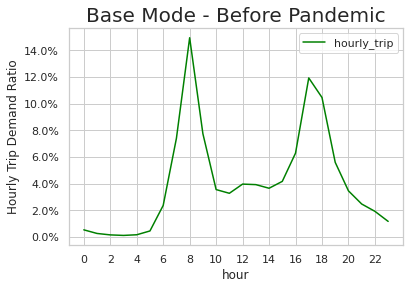

In [52]:
import matplotlib.ticker as mtick

start_wkday_b1_total.plot(color="green")
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')
plt.title('Base Mode - Before Pandemic', fontsize=20)


In [53]:
# nomalized
start_wkday_b1['r_b'] = start_wkday_b1['count']/start_wkday_b1['avg_daily_total']
start_wkday_b1
#start_wkday_b1.to_csv('start_wkday_b1.csv')

,StartStation Id,hour,count,avg_daily_total,r_b
0,1,0,4,543,0.0074
1,1,1,3,543,0.0055
2,1,2,2,543,0.0037
3,1,4,1,543,0.0018
4,1,5,6,543,0.0110
...,...,...,...,...,...
16838,839,19,128,1744,0.0734
16839,839,20,49,1744,0.0281
16840,839,21,23,1744,0.0132
16841,839,22,24,1744,0.0138


In [54]:
#make pivot in size N(785) station*24
#start_wkday_b1
start_wkday_b2=start_wkday_b1.drop(labels=['count', 'avg_daily_total'], axis=1)

start_wkday_b3=start_wkday_b2.pivot_table(columns='hour', index='StartStation Id', values='r_b').reset_index()
start_wkday_b3.fillna(0)

start_wkday_b3.set_index('StartStation Id', inplace=True)
start_wkday_b3

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
StartStation Id,,,,,,,,,,,,,,,,,,,,,
1,0.0074,0.0055,0.0037,NaN,0.0018,0.0110,0.0645,0.1510,0.1842,0.0810,...,0.0258,0.0368,0.0424,0.0994,0.0792,0.0460,0.0110,0.0092,0.0037,0.0092
2,0.0114,NaN,NaN,0.0042,0.0021,0.0062,0.0187,0.0156,0.0998,0.0655,...,0.0447,0.0821,0.0655,0.1143,0.1351,0.0655,0.0281,0.0125,0.0156,0.0270
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0018,0.0272,0.0879,0.0211,...,0.0325,0.0659,0.1169,0.2979,0.1309,0.0343,0.0202,0.0088,0.0088,NaN
4,0.0064,0.0064,0.0129,NaN,0.0043,NaN,0.0021,0.0815,0.2060,0.1223,...,0.0365,0.0215,0.0687,0.0515,0.0708,0.0408,0.0215,0.0215,0.0086,0.0107
5,0.0035,NaN,0.0007,NaN,0.0007,0.0021,0.0153,0.0257,0.0680,0.0743,...,0.0361,0.0444,0.0770,0.1409,0.1700,0.0840,0.0326,0.0354,0.0243,0.0160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,0.0018,NaN,0.0089,0.0018,0.0107,0.0018,0.0213,0.0480,0.2256,0.0906,...,0.0320,0.0373,0.0355,0.0764,0.0675,0.0693,0.0782,0.0266,0.0107,0.0142
835,0.0013,0.0013,NaN,0.0013,NaN,NaN,NaN,0.0026,0.0316,0.0145,...,0.0263,0.0250,0.0789,0.2803,0.3105,0.0882,0.0250,0.0224,0.0053,0.0039
836,0.0060,0.0104,0.0149,0.0030,0.0343,0.0075,0.0388,0.1090,0.1955,0.1209,...,0.0194,0.0418,0.0507,0.0537,0.0567,0.0343,0.0134,0.0104,0.0179,0.0045


In [55]:
start_wkday_b3.to_csv('start_wkday_b3.csv')

In [56]:
# standardisation of the X. This is essential for PCA.
import sys
import numpy
from sklearn.preprocessing import StandardScaler
numpy.set_printoptions(threshold=False)

hour = start_wkday_b3.columns.tolist()
#scaled_data = preprocessing.scale(start_wkday_b3)

#X = StandardScaler().fit_transform(start_wkday_b3)
#pca = PCA(n_components=24)
#X[np.isnan(X)] = 0
#X

In [57]:
from sklearn.decomposition import PCA
#rand_st_int = 10 
pca = PCA()
# fit the components
#pca.fit(X)
#X_new_components = pca.fit_transform(X)

start_wkday_b3[np.isnan(start_wkday_b3)] = 0
pca.fit(start_wkday_b3)
X_new_components = pca.fit_transform(start_wkday_b3)
pca_data = pca.transform(start_wkday_b3)

In [58]:
pca.components_[0][7]

0.3690223072868917

In [59]:
#pca

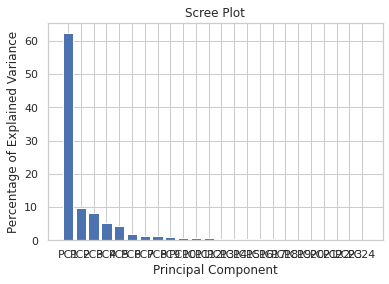

In [60]:
import matplotlib.pyplot as plt

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [61]:
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[6.22719088e-01 9.65130182e-02 8.32877114e-02 ... 2.45198231e-04
 2.10721922e-04 4.25018288e-33]


In [62]:
print('Eigenvalues of each component:')
print(pca.explained_variance_)

Eigenvalues of each component:
[1.60131966e-02 2.48182842e-03 2.14174019e-03 ... 6.30526275e-06
 5.41870585e-06 1.09293284e-34]


In [63]:
pca.n_components_

24

In [64]:
#start_wkday_b3=start_wkday_b3.T
#start_wkday_b3
hour

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [65]:
#X_wkday3 = pd.DataFrame(X.T,columns=hour)
#X_wkday3

In [66]:
pca.components_[0]

array([-0.00090017,  0.0007238 ,  0.00150791, ..., -0.02417752,
       -0.00938951, -0.00666503])

In [67]:
PCnames = ['PC'+str(i+1) for i in range(pca.n_components_)]
Loadings = pd.DataFrame(pca.components_.transpose(),columns=PCnames,index=hour)

Loadings.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
0,-0.0009,-0.0276,0.0126,-0.0391,-0.0234
1,0.0007,-0.0136,0.0091,-0.0116,-0.0127
2,0.0015,-0.0122,0.0034,-0.0067,-0.0042
3,0.0003,-0.0093,0.0010,-0.0022,-0.0037
4,0.0054,-0.0107,0.0056,-0.0029,-0.0073
5,0.0244,-0.0051,0.0407,0.0087,0.0106
6,0.1183,0.0805,0.1876,0.0120,0.0489
7,0.3690,0.4477,0.6564,0.1694,0.2340
8,0.6541,0.3194,-0.5598,-0.0852,-0.3013
9,0.1979,-0.3320,-0.2963,0.0444,0.7794


Text(0.5, 1.0, 'PC1(62.27%)')

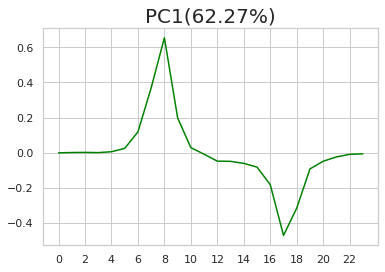

In [68]:
# plt Loadings
Loadings["PC1"].plot(color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC1({:.2f}%)".format(pca.explained_variance_ratio_[0]*100), fontsize=20)  # add title

Text(0.5, 1.0, 'PC2(9.65%)')

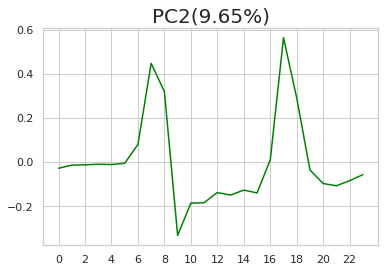

In [69]:
Loadings["PC2"].plot(color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC2({:.2f}%)".format(pca.explained_variance_ratio_[1]*100),fontsize=20)  # add title

Text(0.5, 1.0, 'PC3(8.33%)')

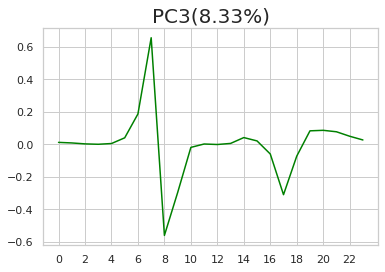

In [70]:
Loadings["PC3"].plot(color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC3({:.2f}%)".format(pca.explained_variance_ratio_[2]*100),fontsize=20)  # add title

Text(0.5, 1.0, 'PC4(5.19%)')

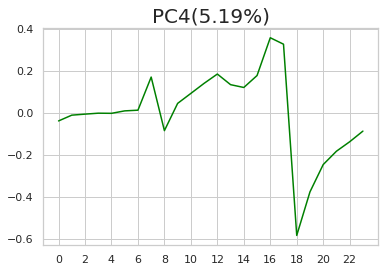

In [71]:
Loadings["PC4"].plot(color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC4({:.2f}%)".format(pca.explained_variance_ratio_[3]*100),fontsize=20)  # add title

Text(0.5, 1.0, 'PC5(4.19%)')

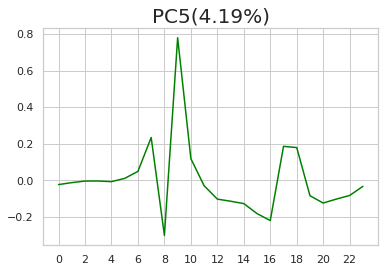

In [72]:
Loadings["PC5"].plot(color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC5({:.2f}%)".format(pca.explained_variance_ratio_[4]*100),fontsize=20)  # add title

In [73]:
station = start_wkday_b3.index.tolist()
#station

In [74]:
pca_data

array([[ 6.87416482e-02,  4.58134662e-02,  3.75858482e-02, ...,
        -1.08463774e-03,  1.16515138e-03,  2.71430317e-17],
       [-8.36047415e-02, -3.80291277e-02, -1.20072547e-02, ...,
         2.51478439e-03, -2.14693125e-03, -9.71562290e-18],
       [-1.87170885e-01,  9.56421996e-02, -5.29003932e-02, ...,
         1.09428584e-04,  3.54396137e-04, -8.71782999e-18],
       ...,
       [ 9.15187666e-02, -2.20235094e-02,  2.27244550e-03, ...,
         1.04312438e-03,  7.85651157e-03,  1.69736945e-19],
       [-3.04372490e-01,  1.73888844e-01, -7.05569549e-02, ...,
         1.21867730e-04,  5.50577481e-04,  2.07724691e-17],
       [-1.16097489e-01,  4.64476249e-02, -1.77141231e-02, ...,
        -2.06357955e-04,  3.90012651e-04,  4.33680869e-18]])

In [75]:
# ## pc1 vs pc2 
pca_df = pd.DataFrame(pca_data, index=station, columns=PCnames)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
1,0.0687,0.0458,0.0376,0.0205,0.0228,-0.0028,0.0224,-0.0021,0.0099,0.0045,...,-0.0035,-0.0033,-0.0060,-0.0084,0.0017,-0.0006,0.0032,-0.0011,0.0012,0.0000
2,-0.0836,-0.0380,-0.0120,-0.0129,-0.0103,-0.0280,0.0177,0.0021,0.0104,-0.0027,...,-0.0029,0.0133,0.0038,-0.0144,-0.0036,-0.0013,-0.0052,0.0025,-0.0021,-0.0000
3,-0.1872,0.0956,-0.0529,0.0775,-0.0086,0.0180,-0.0006,0.0102,-0.0033,-0.0083,...,-0.0060,0.0103,-0.0033,0.0047,0.0008,-0.0008,0.0001,0.0001,0.0004,-0.0000
4,0.0769,-0.0405,-0.0293,0.0117,0.0097,-0.0213,-0.0221,0.0072,0.0222,-0.0031,...,0.0018,-0.0090,-0.0025,-0.0044,0.0066,0.0021,0.0065,0.0002,0.0083,-0.0000
5,-0.1241,-0.0117,0.0003,-0.0399,0.0195,-0.0161,0.0021,-0.0139,0.0066,0.0041,...,0.0050,0.0017,-0.0050,0.0019,-0.0037,0.0006,-0.0024,-0.0004,0.0004,-0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,0.0634,-0.0233,-0.0464,-0.0307,-0.0276,0.0292,-0.0032,0.0126,0.0049,0.0132,...,-0.0036,0.0081,0.0017,-0.0040,-0.0002,0.0093,0.0002,0.0034,0.0066,0.0000
835,-0.2762,0.1234,-0.0363,-0.0868,0.0392,-0.0476,0.0169,0.0010,0.0125,-0.0090,...,0.0014,-0.0074,-0.0112,0.0003,-0.0000,0.0015,0.0016,0.0009,-0.0008,-0.0000
836,0.0915,-0.0220,0.0023,0.0213,0.0197,-0.0102,0.0023,-0.0134,-0.0030,-0.0017,...,-0.0156,0.0126,0.0030,-0.0002,0.0207,0.0288,0.0055,0.0010,0.0079,0.0000
838,-0.3044,0.1739,-0.0706,-0.0416,0.0915,-0.0424,0.0355,0.0240,-0.0174,-0.0259,...,-0.0069,-0.0013,-0.0044,-0.0007,0.0014,0.0009,0.0013,0.0001,0.0006,0.0000


In [76]:
#pca_df_index = pca_df.reset_index(level=0)
#pca_df_index

### 6 stations' Top 2 PCs

In [77]:
#pca_df_index_1 = pca_df_index.loc[pca_df_index['index'] == 14]
#pca_df_index_1['PC1']

#KC
pca_df_index_1_pc1 = pca_df.loc[pca_df.index == 14, "PC1"]
pca_df_index_1_pc1 = float("{0:+.2f}".format(pca_df_index_1_pc1.to_list()[0]))
pca_df_index_1_pc1 = "%+.2f" % (pca_df_index_1_pc1)
pca_df_index_1_pc2 = pca_df.loc[pca_df.index == 14, "PC2"]
pca_df_index_1_pc2 = float("{0:+.2f}".format(pca_df_index_1_pc2.to_list()[0]))
pca_df_index_1_pc2 = "%+.2f" % (pca_df_index_1_pc2)

#Waterloo
pca_df_index_2_pc1 = pca_df.loc[pca_df.index == 154, "PC1"]
pca_df_index_2_pc1 = float("{0:+.2f}".format(pca_df_index_2_pc1.to_list()[0]))
pca_df_index_2_pc1 = "%+.2f" % (pca_df_index_2_pc1)
pca_df_index_2_pc2 = pca_df.loc[pca_df.index == 154, "PC2"]
pca_df_index_2_pc2 = float("{0:+.2f}".format(pca_df_index_2_pc2.to_list()[0]))
pca_df_index_2_pc2 = "%+.2f" % (pca_df_index_2_pc2)

#Euston
pca_df_index_3_pc1 = pca_df.loc[pca_df.index == 214, "PC1"]
pca_df_index_3_pc1 = float("{0:+.2f}".format(pca_df_index_3_pc1.to_list()[0]))
pca_df_index_3_pc1 = "%+.2f" % (pca_df_index_3_pc1)
pca_df_index_3_pc2 = pca_df.loc[pca_df.index == 214, "PC2"]
pca_df_index_3_pc2 = float("{0:+.2f}".format(pca_df_index_3_pc2.to_list()[0]))
pca_df_index_3_pc2 = "%+.2f" % (pca_df_index_3_pc2)

#RP
pca_df_index_4_pc1 = pca_df.loc[pca_df.index == 114, "PC1"]
pca_df_index_4_pc1 = float("{0:+.2f}".format(pca_df_index_4_pc1.to_list()[0]))
pca_df_index_4_pc1 = "%+.2f" % (pca_df_index_4_pc1)
pca_df_index_4_pc2 = pca_df.loc[pca_df.index == 114, "PC2"]
pca_df_index_4_pc2 = float("{0:+.2f}".format(pca_df_index_4_pc2.to_list()[0]))
pca_df_index_4_pc2 = "%+.2f" % (pca_df_index_4_pc2)

#Hyde Park
pca_df_index_5_pc1 = pca_df.loc[pca_df.index == 191, "PC1"]
pca_df_index_5_pc1 = float("{0:+.2f}".format(pca_df_index_5_pc1.to_list()[0]))
pca_df_index_5_pc1 = "%+.2f" % (pca_df_index_5_pc1)
pca_df_index_5_pc2 = pca_df.loc[pca_df.index == 191, "PC2"]
pca_df_index_5_pc2 = float("{0:+.2f}".format(pca_df_index_5_pc2.to_list()[0]))
pca_df_index_5_pc2 = "%+.2f" % (pca_df_index_5_pc2)

#QEOP
pca_df_index_6_pc1 = pca_df.loc[pca_df.index == 785, "PC1"]
pca_df_index_6_pc1 = float("{0:+.2f}".format(pca_df_index_6_pc1.to_list()[0]))
pca_df_index_6_pc1 = "%+.2f" % (pca_df_index_6_pc1)
pca_df_index_6_pc2 = pca_df.loc[pca_df.index == 785, "PC2"]
pca_df_index_6_pc2 = float("{0:+.2f}".format(pca_df_index_6_pc2.to_list()[0]))
pca_df_index_6_pc2 = "%+.2f" % (pca_df_index_6_pc2)


### Reconstructed 6 Stations

In [78]:
import numpy as np
import sklearn.datasets, sklearn.decomposition

mu = np.mean(start_wkday_b3, axis=0)

pca_r = sklearn.decomposition.PCA()
pca_r.fit(start_wkday_b3)

nComp = 2
Xhat = np.dot(pca_r.transform(start_wkday_b3)[:,:nComp], pca_r.components_[:nComp,:])
Xhat += mu

print(Xhat[14,])
print(Xhat[14,])

[0.00578465 0.00267766 0.00145743 ... 0.02938267 0.02123983 0.01306695]
[0.00578465 0.00267766 0.00145743 ... 0.02938267 0.02123983 0.01306695]


#### Belgrove Street, King's Cross

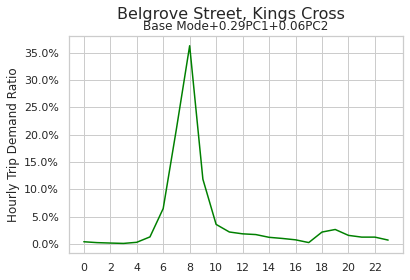

In [79]:
plt.plot(Xhat[13,], color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_1_pc1)+'PC1'+str(pca_df_index_1_pc2)+'PC2', fontsize = 12)
plt.suptitle('Belgrove Street, Kings Cross', fontsize = 16)
plt.show()

#### Waterloo Station 3

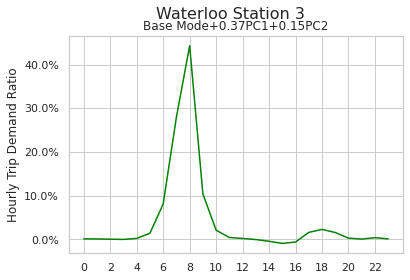

In [80]:
plt.plot(Xhat[149,], color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_2_pc1)+'PC1'+str(pca_df_index_2_pc2)+'PC2', fontsize = 12)
plt.suptitle('Waterloo Station 3', fontsize = 16)
plt.show()

#### Endsleigh Garden, Euston

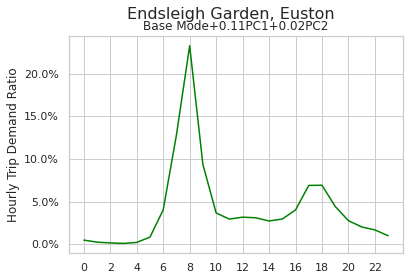

In [81]:
plt.plot(Xhat[206,], color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_3_pc1)+'PC1'+str(pca_df_index_3_pc2)+'PC2', fontsize = 12)
plt.suptitle('Endsleigh Garden, Euston', fontsize = 16)
plt.show()

#### Park Road(Baker Street), The Regent Park

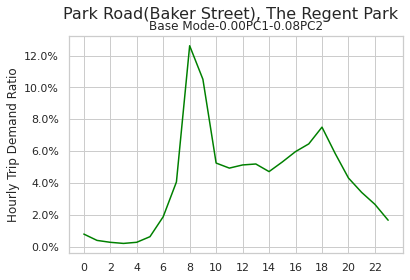

In [82]:
plt.plot(Xhat[111,], color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_4_pc1)+'PC1'+str(pca_df_index_4_pc2)+'PC2', fontsize = 12)
plt.suptitle('Park Road(Baker Street), The Regent Park', fontsize = 16)
plt.show()

#### Hyde Park Corner

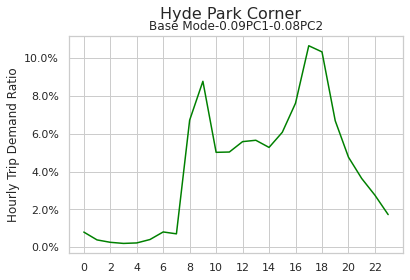

In [83]:
plt.plot(Xhat[185,], color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_5_pc1)+'PC1'+str(pca_df_index_5_pc2)+'PC2', fontsize = 12)
plt.suptitle('Hyde Park Corner', fontsize = 16)
plt.show()

#### Aquatic Centre, Queen Elizabeth Olympic Park

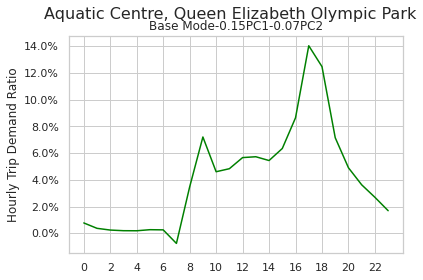

In [84]:
plt.plot(Xhat[738,], color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_6_pc1)+'PC1'+str(pca_df_index_6_pc2)+'PC2', fontsize = 12)
plt.suptitle('Aquatic Centre, Queen Elizabeth Olympic Park', fontsize = 16)
plt.show()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


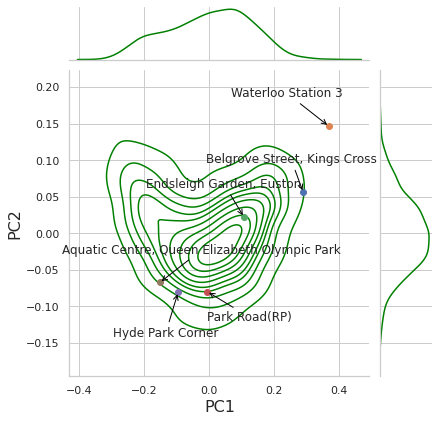

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

pca_df_1_2 = pca_df[['PC1','PC2']]

ind_list = [13,149,206,111,185,738]

ind_list2 = [13,149,206,738]
ind_list3 = [111]
ind_list4 = [185]
pp = pca_df_1_2.iloc[ind_list]
pp2 = pca_df_1_2.iloc[ind_list2]
pp3 = pca_df_1_2.iloc[ind_list3]
pp4 = pca_df_1_2.iloc[ind_list4]
n = ['Belgrove Street, Kings Cross', 'Waterloo Station 3', 'Endsleigh Garden, Euston', 'Park Road(RP)', 'Hyde Park Corner','Aquatic Centre, Queen Elizabeth Olympic Park']
pp['col'] = n
n2 = ['Belgrove Street, Kings Cross', 'Waterloo Station 3', 'Endsleigh Garden, Euston','Aquatic Centre, Queen Elizabeth Olympic Park']
pp2['col'] = n2
n3 = ['Park Road(RP)']
pp3['col'] = n3
n4 = ['Hyde Park Corner']
pp4['col'] = n4

# loading dataset
#color = sns.color_palette()[3]
# draw jointplot with
# kde kind
sns.set(style="whitegrid")
pca_df_1_2 = pca_df[['PC1','PC2']]
g = sns.jointplot(x = "PC1", y = "PC2",
              kind = "kde",data = pca_df_1_2,color ='green')
for i,row in enumerate(pp.values):
    g.ax_joint.plot(row[0], row[1] ,marker='o')

for i, txt in enumerate(pp2.values):
    #g.ax_joint.annotate(txt[2],(txt[0],txt[1]),fontsize=7)
    g.ax_joint.annotate(txt[2], xy=(txt[0], txt[1]), xytext=(txt[0]-0.3, txt[1]+0.04), arrowprops={"arrowstyle":"->", "color":"black"},fontsize=12)
    
for i, txt in enumerate(pp3.values):
    #g.ax_joint.annotate(txt[2],(txt[0],txt[1]),fontsize=7)
    g.ax_joint.annotate(txt[2], xy=(txt[0], txt[1]), xytext=(txt[0], txt[1]-0.04), arrowprops={"arrowstyle":"->", "color":"black"},fontsize=12)
    
for i, txt in enumerate(pp4.values):
    #g.ax_joint.annotate(txt[2],(txt[0],txt[1]),fontsize=7)
    g.ax_joint.annotate(txt[2], xy=(txt[0], txt[1]), xytext=(txt[0]-0.2, txt[1]-0.06), arrowprops={"arrowstyle":"->", "color":"black"},fontsize=12)


g.set_axis_labels('PC1', 'PC2', fontsize=16)

plt.show()

### End station + End date + weekdays

In [85]:
end_b=filtered_b_frame.drop(labels=['StartStation Name', 'EndStation Name', 'Start Date','Duration','Rental Id','Bike Id','StartStation Id'], axis=1)
end_b

,End Date,EndStation Id
5,2019-10-15 18:39:00,228
6,2019-10-15 18:00:00,40
18,2019-10-15 16:50:00,553
20,2019-10-15 21:49:00,374
24,2019-10-15 19:50:00,37
...,...,...
1072769,2019-11-15 07:57:00,194
1072770,2019-11-15 08:56:00,239
1072771,2019-11-13 08:22:00,126
1072772,2019-11-15 09:44:00,295


In [86]:
#drop weekend
end_b["weekday"] = pd.to_datetime(end_b['End Date']).dt.dayofweek
end_b["hour"] = pd.to_datetime(end_b['End Date']).dt.hour
#start_b
end_wkday_b = end_b.drop(end_b.loc[end_b["weekday"] > 4].index)
end_wkday_b=end_wkday_b.drop(labels=['weekday'], axis=1)
end_wkday_b

,End Date,EndStation Id,hour
5,2019-10-15 18:39:00,228,18
6,2019-10-15 18:00:00,40,18
18,2019-10-15 16:50:00,553,16
20,2019-10-15 21:49:00,374,21
24,2019-10-15 19:50:00,37,19
...,...,...,...
1072769,2019-11-15 07:57:00,194,7
1072770,2019-11-15 08:56:00,239,8
1072771,2019-11-13 08:22:00,126,8
1072772,2019-11-15 09:44:00,295,9


In [87]:
#count number trips by hours
end_wkday_b1=end_wkday_b.groupby([pd.Grouper(key='EndStation Id'),end_wkday_b['hour']]).size().reset_index(name='count')
#count all number trips by hour
#start_wkday_b1['avg_hour'] = start_wkday_b1.groupby('hour')['count'].transform('mean')
#start_wkday_b1['hour_count'] = start_wkday_b1.groupby('hour')['count'].transform('sum')

#start_wkday_b1['total'] = start_wkday_b1.groupby('hour').agg({'count':'count'})
end_wkday_b1['avg_daily_total'] = end_wkday_b1.groupby('EndStation Id')['count'].transform('sum')
print(end_wkday_b1)
#start_wkday_b1.to_csv('start_wkday_b1.csv')

       EndStation Id  hour  count  avg_daily_total
0                  1     0      3              343
1                  1     1      2              343
2                  1     2      3              343
3                  1     4      2              343
4                  1     5      1              343
...              ...   ...    ...              ...
16829            839    19     46             1747
16830            839    20     19             1747
16831            839    21     19             1747
16832            839    22     19             1747
16833            839    23     12             1747

[16834 rows x 4 columns]


In [88]:
# nomalized
end_wkday_b1['r_b'] = end_wkday_b1['count']/end_wkday_b1['avg_daily_total']
end_wkday_b1
#start_wkday_b1.to_csv('start_wkday_b1.csv')

#make pivot in size N(785) station*24
#start_wkday_b1
end_wkday_b2=end_wkday_b1.drop(labels=['count', 'avg_daily_total'], axis=1)

end_wkday_b3=end_wkday_b2.pivot_table(columns='hour', index='EndStation Id', values='r_b').reset_index()
end_wkday_b3.fillna(0)

end_wkday_b3.set_index('EndStation Id', inplace=True)
end_wkday_b3

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
EndStation Id,,,,,,,,,,,,,,,,,,,,,
1,0.0087,0.0058,0.0087,NaN,0.0058,0.0029,0.0437,0.0321,0.0292,0.0466,...,0.0262,0.0321,0.0816,0.0933,0.1487,0.0991,0.0845,0.0554,0.0466,0.0292
2,0.0011,0.0032,0.0011,NaN,0.0043,0.0021,0.0279,0.0462,0.1332,0.1042,...,0.0483,0.0677,0.0634,0.0720,0.0816,0.0430,0.0354,0.0204,0.0097,0.0043
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0264,0.1325,0.3041,0.1809,...,0.0249,0.0185,0.0321,0.0620,0.0278,0.0114,0.0028,0.0028,0.0007,0.0028
4,NaN,0.0068,NaN,0.0017,NaN,NaN,0.0051,0.0135,0.0439,0.0608,...,0.0321,0.0473,0.0794,0.1149,0.2247,0.0980,0.0557,0.0304,0.0321,0.0084
5,0.0013,NaN,0.0019,NaN,0.0006,0.0025,0.0592,0.1630,0.1680,0.0796,...,0.0376,0.0325,0.0439,0.0770,0.1095,0.0477,0.0191,0.0140,0.0070,0.0045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,NaN,NaN,0.0076,0.0019,NaN,0.0362,0.0248,0.0457,0.0857,0.0324,...,0.0229,0.0590,0.0419,0.1162,0.1733,0.1181,0.0667,0.0324,0.0210,0.0171
835,NaN,NaN,NaN,NaN,NaN,0.0013,0.1594,0.2596,0.2938,0.0540,...,0.0079,0.0053,0.0264,0.0395,0.0237,0.0211,0.0105,0.0105,0.0026,0.0026
836,0.0184,0.0055,0.0037,0.0037,0.0055,0.0018,0.0018,0.0312,0.0184,0.0496,...,0.0423,0.0349,0.0772,0.0882,0.1452,0.1213,0.0809,0.0790,0.0551,0.0294


In [89]:
# standardisation of the X. This is essential for PCA.
import sys
import numpy
from sklearn.preprocessing import StandardScaler
numpy.set_printoptions(threshold=False)

hour = end_wkday_b3.columns.tolist()
#scaled_data = preprocessing.scale(start_wkday_b3)

#X = StandardScaler().fit_transform(start_wkday_b3)
#pca = PCA(n_components=24)
#rand_st_int = 10 
pca = PCA()
# fit the components
#pca.fit(X)
#X_new_components = pca.fit_transform(X)

end_wkday_b3[np.isnan(end_wkday_b3)] = 0
pca.fit(end_wkday_b3)
X_new_components = pca.fit_transform(end_wkday_b3)
pca_data = pca.transform(end_wkday_b3)

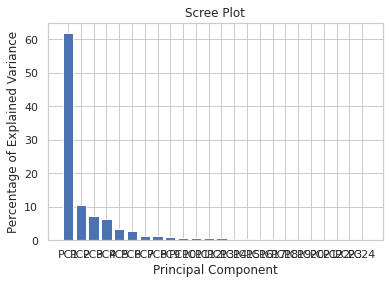

In [90]:
import matplotlib.pyplot as plt

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [91]:
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

print('Eigenvalues of each component:')
print(pca.explained_variance_)

Explained variance ratio of each component:
[6.18290762e-01 1.03970283e-01 7.16893533e-02 ... 3.75418904e-04
 2.24995084e-04 5.43341645e-33]
Eigenvalues of each component:
[1.59956782e-02 2.68979465e-03 1.85466110e-03 ... 9.71238834e-06
 5.82080339e-06 1.40566844e-34]


In [92]:
PCnames = ['PC'+str(i+1) for i in range(pca.n_components_)]
Loadings = pd.DataFrame(pca.components_.transpose(),columns=PCnames,index=hour)

Loadings.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
0,-0.0293,0.0017,-0.0412,-0.0392,-0.0153
1,-0.0164,0.0028,-0.0234,-0.0193,0.0004
2,-0.0083,0.0033,-0.0076,-0.0071,-0.0116
3,-0.0043,0.0017,-0.0001,-0.0079,-0.0068
4,-0.0022,-0.0024,0.0086,-0.0079,0.0083
5,0.0039,-0.0146,0.0063,-0.0155,0.0269
6,0.0470,-0.1279,0.0121,-0.0816,0.1983
7,0.2278,-0.4853,0.0208,-0.2256,0.7007
8,0.6531,-0.4190,-0.1307,0.3166,-0.4729
9,0.4057,0.6532,-0.0341,0.4023,0.3261


Text(0.5, 1.0, 'PC1(61.83%)')

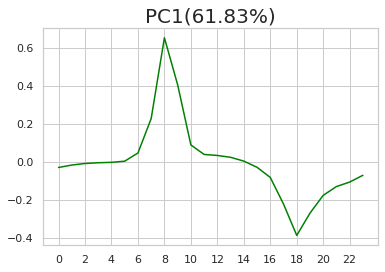

In [93]:
# plt Loadings
Loadings["PC1"].plot(color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC1({:.2f}%)".format(pca.explained_variance_ratio_[0]*100),fontsize=20)  # add title

Text(0.5, 1.0, 'PC2(10.40%)')

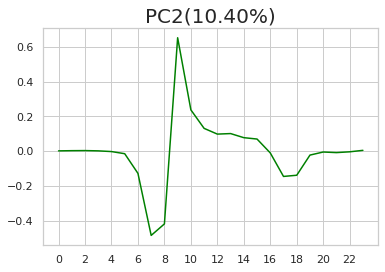

In [94]:
Loadings["PC2"].plot(color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC2({:.2f}%)".format(pca.explained_variance_ratio_[1]*100),fontsize=20)  # add title

Text(0.5, 1.0, 'PC3(7.17%)')

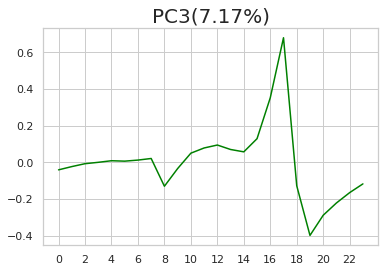

In [95]:
Loadings["PC3"].plot(color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC3({:.2f}%)".format(pca.explained_variance_ratio_[2]*100),fontsize=20)  # add title

Text(0.5, 1.0, 'PC4(6.54%)')

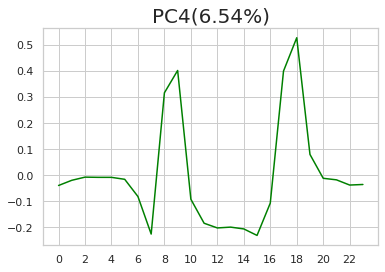

In [96]:
Loadings["PC4"].plot(color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC4({:.2f}%)".format(pca.explained_variance_ratio_[3]*100),fontsize=20)  # add title

In [97]:
# ## pc1 vs pc2 
pca_df = pd.DataFrame(pca_data, index=station, columns=PCnames)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
1,-0.1038,0.0062,-0.0169,-0.0278,0.0154,-0.0168,0.0192,-0.0116,0.0384,0.0073,...,-0.0125,0.0015,0.0023,-0.0041,-0.0023,0.0033,0.0052,0.0005,-0.0050,0.0000
2,0.0609,0.0305,0.0228,-0.0473,-0.0140,0.0176,-0.0059,-0.0033,0.0119,0.0069,...,0.0030,0.0001,0.0044,-0.0017,-0.0007,0.0022,0.0011,-0.0034,-0.0011,0.0000
3,0.2653,-0.0353,0.0039,0.0152,0.0087,-0.0151,-0.0034,0.0045,-0.0018,-0.0100,...,0.0012,-0.0004,-0.0025,-0.0039,-0.0033,-0.0005,-0.0007,0.0010,-0.0001,0.0000
4,-0.1157,0.0153,0.0073,0.0325,0.0056,0.0551,0.0155,-0.0075,0.0050,-0.0027,...,0.0061,0.0052,0.0121,-0.0019,-0.0021,0.0038,-0.0027,-0.0021,0.0011,0.0000
5,0.0901,-0.0835,0.0073,-0.0288,0.0693,0.0177,0.0036,0.0021,0.0067,0.0115,...,-0.0045,0.0029,-0.0009,-0.0038,-0.0042,-0.0010,0.0005,0.0021,-0.0007,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,-0.0779,-0.0380,-0.0151,0.0122,0.0042,0.0110,-0.0123,0.0203,0.0171,0.0081,...,-0.0019,0.0052,0.0041,0.0148,0.0300,-0.0005,0.0013,0.0049,-0.0010,0.0000
835,0.2402,-0.2041,-0.0200,-0.0674,0.0937,-0.0277,-0.0053,0.0080,0.0727,0.0478,...,0.0012,-0.0043,0.0010,-0.0120,-0.0145,0.0009,-0.0007,0.0022,-0.0001,0.0000
836,-0.1199,0.0172,-0.0352,-0.0319,0.0077,-0.0271,0.0284,-0.0074,-0.0092,-0.0069,...,0.0037,0.0008,0.0038,0.0018,-0.0025,-0.0026,0.0044,-0.0013,0.0001,0.0000
838,0.3269,-0.1906,-0.0574,0.0109,0.0056,0.0122,0.0073,0.0045,-0.0181,-0.0338,...,-0.0072,0.0021,-0.0016,-0.0009,-0.0040,0.0002,0.0001,0.0012,0.0004,0.0000


### 6 stations' Top 2 PCs

In [98]:
#pca_df_index_1 = pca_df_index.loc[pca_df_index['index'] == 14]
#pca_df_index_1['PC1']

#KC
pca_df_index_1_pc1 = pca_df.loc[pca_df.index == 14, "PC1"]
pca_df_index_1_pc1 = float("{0:+.2f}".format(pca_df_index_1_pc1.to_list()[0]))
pca_df_index_1_pc1 = "%+.2f" % (pca_df_index_1_pc1)
pca_df_index_1_pc2 = pca_df.loc[pca_df.index == 14, "PC2"]
pca_df_index_1_pc2 = float("{0:+.2f}".format(pca_df_index_1_pc2.to_list()[0]))
pca_df_index_1_pc2 = "%+.2f" % (pca_df_index_1_pc2)

#Waterloo
pca_df_index_2_pc1 = pca_df.loc[pca_df.index == 154, "PC1"]
pca_df_index_2_pc1 = float("{0:+.2f}".format(pca_df_index_2_pc1.to_list()[0]))
pca_df_index_2_pc1 = "%+.2f" % (pca_df_index_2_pc1)
pca_df_index_2_pc2 = pca_df.loc[pca_df.index == 154, "PC2"]
pca_df_index_2_pc2 = float("{0:+.2f}".format(pca_df_index_2_pc2.to_list()[0]))
pca_df_index_2_pc2 = "%+.2f" % (pca_df_index_2_pc2)

#Euston
pca_df_index_3_pc1 = pca_df.loc[pca_df.index == 214, "PC1"]
pca_df_index_3_pc1 = float("{0:+.2f}".format(pca_df_index_3_pc1.to_list()[0]))
pca_df_index_3_pc1 = "%+.2f" % (pca_df_index_3_pc1)
pca_df_index_3_pc2 = pca_df.loc[pca_df.index == 214, "PC2"]
pca_df_index_3_pc2 = float("{0:+.2f}".format(pca_df_index_3_pc2.to_list()[0]))
pca_df_index_3_pc2 = "%+.2f" % (pca_df_index_3_pc2)

#RP
pca_df_index_4_pc1 = pca_df.loc[pca_df.index == 114, "PC1"]
pca_df_index_4_pc1 = float("{0:+.2f}".format(pca_df_index_4_pc1.to_list()[0]))
pca_df_index_4_pc1 = "%+.2f" % (pca_df_index_4_pc1)
pca_df_index_4_pc2 = pca_df.loc[pca_df.index == 114, "PC2"]
pca_df_index_4_pc2 = float("{0:+.2f}".format(pca_df_index_4_pc2.to_list()[0]))
pca_df_index_4_pc2 = "%+.2f" % (pca_df_index_4_pc2)

#Hyde Park
pca_df_index_5_pc1 = pca_df.loc[pca_df.index == 191, "PC1"]
pca_df_index_5_pc1 = float("{0:+.2f}".format(pca_df_index_5_pc1.to_list()[0]))
pca_df_index_5_pc1 = "%+.2f" % (pca_df_index_5_pc1)
pca_df_index_5_pc2 = pca_df.loc[pca_df.index == 191, "PC2"]
pca_df_index_5_pc2 = float("{0:+.2f}".format(pca_df_index_5_pc2.to_list()[0]))
pca_df_index_5_pc2 = "%+.2f" % (pca_df_index_5_pc2)

#QEOP
pca_df_index_6_pc1 = pca_df.loc[pca_df.index == 785, "PC1"]
pca_df_index_6_pc1 = float("{0:+.2f}".format(pca_df_index_6_pc1.to_list()[0]))
pca_df_index_6_pc1 = "%+.2f" % (pca_df_index_6_pc1)
pca_df_index_6_pc2 = pca_df.loc[pca_df.index == 785, "PC2"]
pca_df_index_6_pc2 = float("{0:+.2f}".format(pca_df_index_6_pc2.to_list()[0]))
pca_df_index_6_pc2 = "%+.2f" % (pca_df_index_6_pc2)


### Reconstructed 6 Stations

In [99]:
import numpy as np
import sklearn.datasets, sklearn.decomposition

mu = np.mean(end_wkday_b3, axis=0)

pca_r = sklearn.decomposition.PCA()
pca_r.fit(end_wkday_b3)

nComp = 2
Xhat = np.dot(pca_r.transform(end_wkday_b3)[:,:nComp], pca_r.components_[:nComp,:])
Xhat += mu

print(Xhat[14,])
print(Xhat[14,])

[0.00293487 0.00190356 0.00125013 ... 0.01215631 0.00909967 0.00672491]
[0.00293487 0.00190356 0.00125013 ... 0.01215631 0.00909967 0.00672491]


#### Belgrove Street, King's Cross

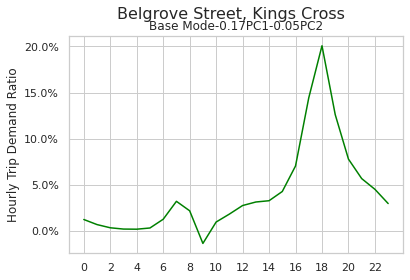

In [100]:
plt.plot(Xhat[13,], color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_1_pc1)+'PC1'+str(pca_df_index_1_pc2)+'PC2', fontsize = 12)
plt.suptitle('Belgrove Street, Kings Cross', fontsize = 16)
plt.show()

#### Waterloo Station 3

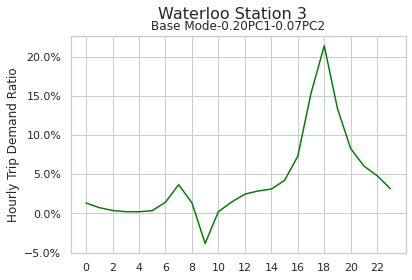

In [101]:
plt.plot(Xhat[149,], color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_2_pc1)+'PC1'+str(pca_df_index_2_pc2)+'PC2', fontsize = 12)
plt.suptitle('Waterloo Station 3', fontsize = 16)
plt.show()

#### Endsleigh Garden, Euston

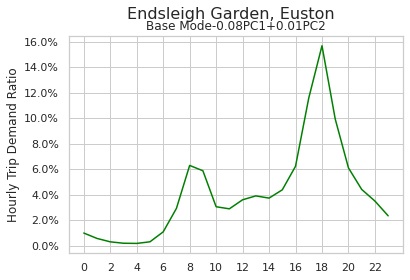

In [102]:
plt.plot(Xhat[206,], color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_3_pc1)+'PC1'+str(pca_df_index_3_pc2)+'PC2', fontsize = 12)
plt.suptitle('Endsleigh Garden, Euston', fontsize = 16)
plt.show()

#### Park Road(Baker Street), The Regent Park

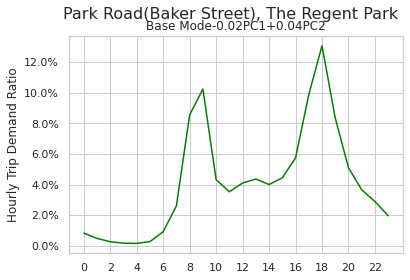

In [103]:
plt.plot(Xhat[111,], color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_4_pc1)+'PC1'+str(pca_df_index_4_pc2)+'PC2', fontsize = 12)
plt.suptitle('Park Road(Baker Street), The Regent Park', fontsize = 16)
plt.show()

#### Hyde Park Corner

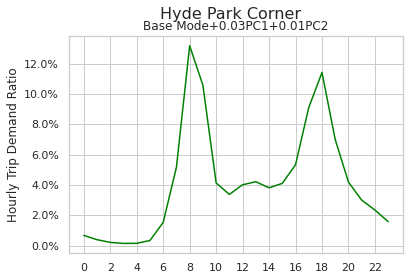

In [104]:
plt.plot(Xhat[185,], color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_5_pc1)+'PC1'+str(pca_df_index_5_pc2)+'PC2', fontsize = 12)
plt.suptitle('Hyde Park Corner', fontsize = 16)
plt.show()

#### Aquatic Centre, Queen Elizabeth Olympic Park

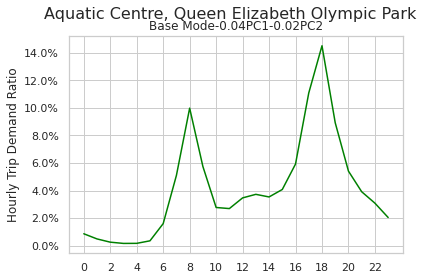

In [105]:
plt.plot(Xhat[738,], color = 'green')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_6_pc1)+'PC1'+str(pca_df_index_6_pc2)+'PC2', fontsize = 12)
plt.suptitle('Aquatic Centre, Queen Elizabeth Olympic Park', fontsize = 16)
plt.show()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


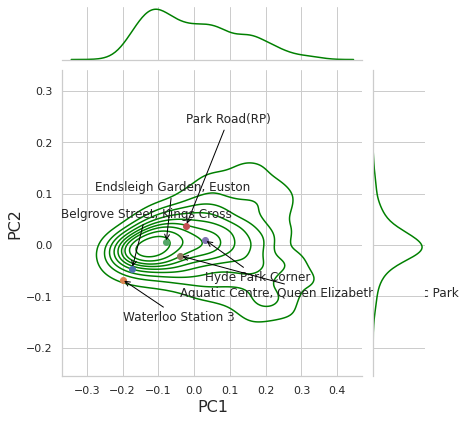

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

pca_df_1_2 = pca_df[['PC1','PC2']]

ind_list = [13,149,206,111,185,738]
pp = pca_df_1_2.iloc[ind_list]
n = ['Belgrove Street, Kings Cross', 'Waterloo Station 3', 'Endsleigh Garden, Euston', 'Park Road(RP)', 'Hyde Park Corner','Aquatic Centre, Queen Elizabeth Olympic Park']
pp['col'] = n

ind_list2 = [149,185,738]
pp2 = pca_df_1_2.iloc[ind_list2]
n2 = ['Waterloo Station 3','Hyde Park Corner','Aquatic Centre, Queen Elizabeth Olympic Park']
pp2['col'] = n2

ind_list3 = [111]
pp3 = pca_df_1_2.iloc[ind_list3]
n3 = ['Park Road(RP)']
pp3['col'] = n3

ind_list4 = [13,206]
pp4 = pca_df_1_2.iloc[ind_list4]
n4 = ['Belgrove Street, Kings Cross','Endsleigh Garden, Euston']
pp4['col'] = n4

# loading dataset
#color = sns.color_palette()[3]
# draw jointplot with
# kde kind
sns.set(style="whitegrid")
pca_df_1_2 = pca_df[['PC1','PC2']]
g = sns.jointplot(x = "PC1", y = "PC2",
              kind = "kde",data = pca_df_1_2,color ='green')
for i,row in enumerate(pp.values):
    g.ax_joint.plot(row[0], row[1] ,marker='o')

for i, txt in enumerate(pp2.values):
    #g.ax_joint.annotate(txt[2],(txt[0],txt[1]),fontsize=7)
    g.ax_joint.annotate(txt[2], xy=(txt[0], txt[1]), xytext=(txt[0], txt[1]-0.08), arrowprops={"arrowstyle":"->", "color":"black"},fontsize=12)
    
for i, txt in enumerate(pp3.values):
    #g.ax_joint.annotate(txt[2],(txt[0],txt[1]),fontsize=7)
    g.ax_joint.annotate(txt[2], xy=(txt[0], txt[1]), xytext=(txt[0], txt[1]+0.2), arrowprops={"arrowstyle":"->", "color":"black"},fontsize=12)

for i, txt in enumerate(pp4.values):
    #g.ax_joint.annotate(txt[2],(txt[0],txt[1]),fontsize=7)
    g.ax_joint.annotate(txt[2], xy=(txt[0], txt[1]), xytext=(txt[0]-0.2, txt[1]+0.1), arrowprops={"arrowstyle":"->", "color":"black"},fontsize=12)

g.set_axis_labels('PC1', 'PC2', fontsize=16)

plt.show()

## During Data

In [107]:
import glob
import os
import os.path as osp

during_path = osp.join(osp.dirname(osp.realpath("__file__")),'data','During') # Before Path
all_during_files = glob.glob(during_path + "/*.csv")

lid = []

for filename in all_during_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    lid.append(df)

during_frame = pd.concat(lid, axis=0, ignore_index=True)

during_frame['Start Date'] = pd.to_datetime(during_frame['Start Date'], format="%d/%m/%Y %H:%M")
during_frame['End Date'] = pd.to_datetime(during_frame['End Date'], format="%d/%m/%Y %H:%M")
#during_frame

filtered_d_frame = during_frame.loc[(during_frame['Start Date'] > '2020-10-14 23:59')
                     & (during_frame['Start Date'] < '2020-11-16 00:00')]

filtered_d_frame

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,102889854,480,16883,2020-10-15 08:52:00,97,"Gloucester Road (North), Kensington",2020-10-15 08:44:00,225,"Notting Hill Gate Station, Notting Hill"
1,103024218,420,17755,2020-10-19 09:12:00,97,"Gloucester Road (North), Kensington",2020-10-19 09:05:00,225,"Notting Hill Gate Station, Notting Hill"
2,102957581,480,14140,2020-10-17 11:39:00,97,"Gloucester Road (North), Kensington",2020-10-17 11:31:00,225,"Notting Hill Gate Station, Notting Hill"
4,102906253,660,17806,2020-10-15 18:07:00,622,"Lansdowne Road, Ladbroke Grove",2020-10-15 17:56:00,97,"Gloucester Road (North), Kensington"
5,102963722,660,14140,2020-10-17 13:51:00,622,"Lansdowne Road, Ladbroke Grove",2020-10-17 13:40:00,97,"Gloucester Road (North), Kensington"
...,...,...,...,...,...,...,...,...,...
930855,103715116,900,8412,2020-11-12 18:32:00,828,"Normandy Road, Stockwell",2020-11-12 18:17:00,828,"Normandy Road, Stockwell"
930856,103718514,1440,16482,2020-11-12 20:38:00,828,"Normandy Road, Stockwell",2020-11-12 20:14:00,828,"Normandy Road, Stockwell"
930858,103740103,180,18288,2020-11-13 18:05:00,772,"Binfield Road, Stockwell",2020-11-13 18:02:00,828,"Normandy Road, Stockwell"
930859,103776172,1020,1031,2020-11-15 14:35:00,370,"Paddington Green, Paddington",2020-11-15 14:18:00,751,"Newton Street, Covent Garden"


### Start Station + weekdays

In [108]:
start_d=filtered_d_frame.drop(labels=['StartStation Name', 'EndStation Name', 'End Date','Duration','Rental Id','Bike Id','EndStation Id'], axis=1)
start_d

,Start Date,StartStation Id
0,2020-10-15 08:44:00,225
1,2020-10-19 09:05:00,225
2,2020-10-17 11:31:00,225
4,2020-10-15 17:56:00,97
5,2020-10-17 13:40:00,97
...,...,...
930855,2020-11-12 18:17:00,828
930856,2020-11-12 20:14:00,828
930858,2020-11-13 18:02:00,828
930859,2020-11-15 14:18:00,751


In [109]:
#drop weekend
start_d["weekday"] = pd.to_datetime(start_d['Start Date']).dt.dayofweek
start_d["hour"] = pd.to_datetime(start_d['Start Date']).dt.hour
#start_b
start_wkday_d = start_d.drop(start_d.loc[start_d["weekday"] > 4].index)
start_wkday_d=start_wkday_d.drop(labels=['weekday'], axis=1)
start_wkday_d

,Start Date,StartStation Id,hour
0,2020-10-15 08:44:00,225,8
1,2020-10-19 09:05:00,225,9
4,2020-10-15 17:56:00,97,17
8,2020-10-19 16:24:00,133,16
10,2020-10-20 06:51:00,154,6
...,...,...,...
930852,2020-11-13 13:51:00,828,13
930855,2020-11-12 18:17:00,828,18
930856,2020-11-12 20:14:00,828,20
930858,2020-11-13 18:02:00,828,18


In [110]:
start_wkday_d1=start_wkday_d.groupby([pd.Grouper(key='StartStation Id'),start_wkday_d['hour']]).size().reset_index(name='count')
start_wkday_d1['avg_daily_total'] = start_wkday_d1.groupby('StartStation Id')['count'].transform('sum')
print(start_wkday_d1)

       StartStation Id  hour  count  avg_daily_total
0                    1     0      2              398
1                    1     1      6              398
2                    1     6     12              398
3                    1     7     56              398
4                    1     8     42              398
...                ...   ...    ...              ...
17074              842    19     65              813
17075              842    20     34              813
17076              842    21     39              813
17077              842    22     41              813
17078              842    23     32              813

[17079 rows x 4 columns]


Text(0.5, 1.0, 'Base Mode - During Pandemic')

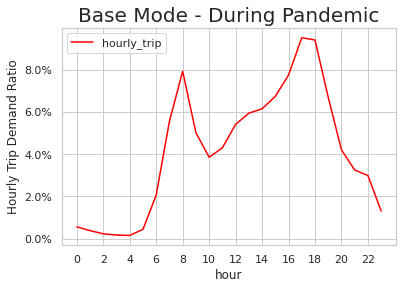

In [111]:
#hourly trips in total
start_wkday_d1_total=start_wkday_d1.drop(labels=['StartStation Id', 'avg_daily_total'], axis=1)
start_wkday_d1_total['countintotal'] = start_wkday_d1_total.groupby('hour')['count'].transform('sum')
start_wkday_d1_total=start_wkday_d1_total.drop_duplicates(subset='hour')
#start_wkday_b1_total.set_index('hour', inplace=True)
start_wkday_d1_total=start_wkday_d1_total.sort_values("hour")
start_wkday_d1_total.set_index('hour', inplace=True)
start_wkday_d1_total=start_wkday_d1_total.drop(labels=['count'], axis=1)

start_wkday_d1_total['total'] = start_wkday_d1_total['countintotal'].sum()
start_wkday_d1_total['hourly_trip'] = start_wkday_d1_total['countintotal']/start_wkday_d1_total['total']
start_wkday_d1_total = start_wkday_d1_total.drop(labels=['countintotal','total'], axis=1)

import matplotlib.ticker as mtick

start_wkday_d1_total.plot(color="red")
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')
plt.title('Base Mode - During Pandemic',fontsize = 20)


In [112]:
# nomalized
start_wkday_d1['r_b'] = start_wkday_d1['count']/start_wkday_d1['avg_daily_total']
start_wkday_d1
#start_wkday_b1.to_csv('start_wkday_b1.csv')

,StartStation Id,hour,count,avg_daily_total,r_b
0,1,0,2,398,0.0050
1,1,1,6,398,0.0151
2,1,6,12,398,0.0302
3,1,7,56,398,0.1407
4,1,8,42,398,0.1055
...,...,...,...,...,...
17074,842,19,65,813,0.0800
17075,842,20,34,813,0.0418
17076,842,21,39,813,0.0480
17077,842,22,41,813,0.0504


In [113]:
#make pivot in size N(785) station*24
#start_wkday_b1
start_wkday_d2=start_wkday_d1.drop(labels=['count', 'avg_daily_total'], axis=1)

start_wkday_d3=start_wkday_d2.pivot_table(columns='hour', index='StartStation Id', values='r_b').reset_index()
start_wkday_d3.fillna(0)

start_wkday_d3.set_index('StartStation Id', inplace=True)
start_wkday_d3

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
StartStation Id,,,,,,,,,,,,,,,,,,,,,
1,0.0050,0.0151,NaN,NaN,NaN,NaN,0.0302,0.1407,0.1055,0.0854,...,0.0377,0.0352,0.0553,0.0879,0.0704,0.0754,0.0302,0.0126,0.0151,0.0075
2,0.0063,0.0009,NaN,NaN,0.0009,0.0036,0.0179,0.0179,0.0627,0.0421,...,0.0636,0.0743,0.0824,0.0859,0.1012,0.0716,0.0573,0.0215,0.0304,0.0098
3,NaN,NaN,NaN,0.0023,NaN,NaN,0.0047,0.0140,0.0981,0.0304,...,0.0374,0.0514,0.1542,0.1402,0.1379,0.0911,0.0491,0.0234,0.0327,0.0187
4,0.0180,0.0180,NaN,NaN,NaN,NaN,0.0072,0.0396,0.0863,0.0468,...,0.0791,0.0432,0.0647,0.0935,0.0755,0.0504,0.0791,0.0683,0.0108,0.0072
5,0.0007,0.0007,0.0007,0.0015,0.0007,NaN,0.0176,0.0778,0.0624,0.0514,...,0.0543,0.0705,0.0800,0.1439,0.1307,0.0653,0.0419,0.0206,0.0352,0.0073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,NaN,0.0022,0.0022,NaN,0.0022,NaN,0.0044,0.0481,0.0372,0.0394,...,0.0744,0.0722,0.0832,0.1838,0.1510,0.0897,0.0263,0.0175,0.0153,0.0044
839,0.0010,0.0087,0.0010,0.0010,NaN,0.0019,0.0444,0.0608,0.0994,0.0319,...,0.0763,0.0589,0.0734,0.0859,0.0965,0.0772,0.0415,0.0560,0.0261,0.0232
840,0.0118,0.0098,NaN,NaN,0.0049,0.0059,0.0127,0.0607,0.0930,0.0695,...,0.0695,0.0529,0.0695,0.0852,0.0960,0.0411,0.0480,0.0333,0.0176,0.0078


In [114]:
# standardisation of the X. This is essential for PCA.
import sys
import numpy
from sklearn.preprocessing import StandardScaler
numpy.set_printoptions(threshold=False)

hour = start_wkday_d3.columns.tolist()
from sklearn.decomposition import PCA
#rand_st_int = 10 
pca = PCA()
# fit the components
#pca.fit(X)
#X_new_components = pca.fit_transform(X)

start_wkday_d3[np.isnan(start_wkday_d3)] = 0
pca.fit(start_wkday_d3)
X_new_components = pca.fit_transform(start_wkday_d3)
pca_data = pca.transform(start_wkday_d3)

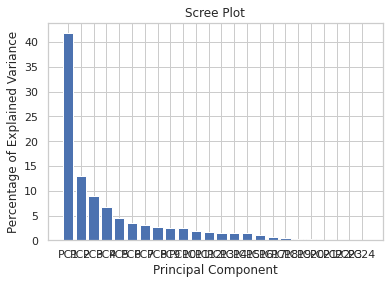

In [115]:
import matplotlib.pyplot as plt

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [116]:
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[4.17628002e-01 1.29158484e-01 9.01741687e-02 ... 9.26912060e-04
 8.20448578e-04 5.78455686e-33]


In [117]:
print('Eigenvalues of each component:')
print(pca.explained_variance_)

Eigenvalues of each component:
[4.57391321e-03 1.41455959e-03 9.87598579e-04 ... 1.01516548e-05
 8.98565367e-06 6.33531777e-35]


In [118]:
PCnames = ['PC'+str(i+1) for i in range(pca.n_components_)]
Loadings = pd.DataFrame(pca.components_.transpose(),columns=PCnames,index=hour)

Loadings.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
0,-0.0113,-0.0301,0.0559,-0.0000,0.0299
1,-0.0038,-0.0202,0.0404,-0.0074,0.0238
2,-0.0072,-0.0106,0.0211,-0.0012,0.0242
3,-0.0018,-0.0031,0.0045,-0.0050,0.0032
4,0.0038,-0.0071,0.0058,0.0048,-0.0014
5,0.0305,-0.0130,0.0030,-0.0161,-0.0156
6,0.1670,0.0891,0.0759,0.0465,-0.0251
7,0.4912,0.4336,0.2845,0.6034,-0.0425
8,0.5437,0.1166,-0.3895,-0.4766,0.4313
9,0.2349,-0.0899,-0.1211,-0.1681,-0.3753


Text(0.5, 1.0, 'PC1(41.76%)')

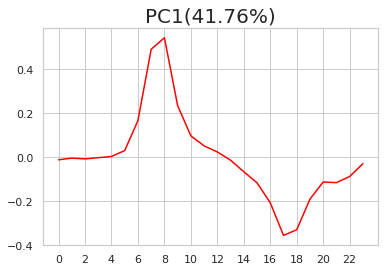

In [119]:
# plt Loadings
Loadings["PC1"].plot(color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC1({:.2f}%)".format(pca.explained_variance_ratio_[0]*100),fontsize = 20)  # add title

Text(0.5, 1.0, 'PC2(12.92%)')

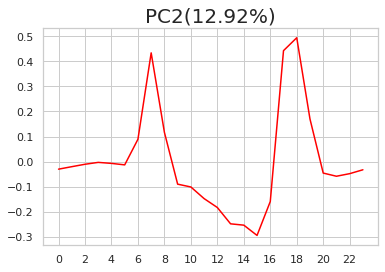

In [120]:
Loadings["PC2"].plot(color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC2({:.2f}%)".format(pca.explained_variance_ratio_[1]*100),fontsize = 20)  # add title

Text(0.5, 1.0, 'PC3(9.02%)')

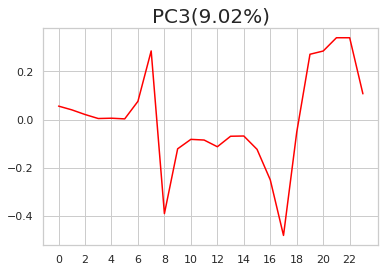

In [121]:
Loadings["PC3"].plot(color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC3({:.2f}%)".format(pca.explained_variance_ratio_[2]*100),fontsize = 20)  # add title

Text(0.5, 1.0, 'PC4(6.72%)')

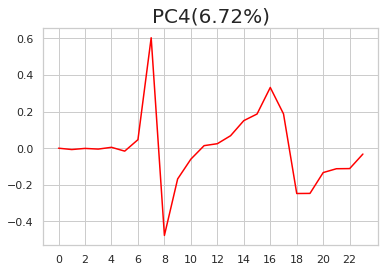

In [122]:
Loadings["PC4"].plot(color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC4({:.2f}%)".format(pca.explained_variance_ratio_[3]*100),fontsize = 20)  # add title

In [123]:
pca_data

array([[ 8.94040070e-02,  4.80257807e-02,  1.33557016e-02, ...,
         2.35106266e-03, -6.05347358e-04, -2.74733677e-18],
       [-3.07647731e-02, -2.94076156e-02, -5.36836374e-03, ...,
         3.39908469e-04,  1.35898941e-03,  6.59831911e-18],
       [-7.01196181e-02,  4.18833940e-02, -4.39406187e-02, ...,
        -2.22293555e-04, -1.24581629e-03, -3.93254063e-18],
       ...,
       [ 2.30055384e-02, -6.24437930e-03, -1.01343918e-02, ...,
         5.78728115e-03, -1.11841200e-03, -1.48909608e-17],
       [ 6.01235124e-02,  4.67126156e-03,  1.41055464e-02, ...,
        -4.19213521e-04, -5.71201834e-04, -1.58870517e-19],
       [-6.45305606e-02, -1.05475650e-02,  3.51371034e-02, ...,
        -1.08360246e-03,  9.23375080e-05,  6.93889390e-18]])

In [124]:
# ## pc1 vs pc2
station = start_wkday_d3.index.tolist()
pca_df = pd.DataFrame(pca_data, index=station, columns=PCnames)
#pca_df.to_csv("duringpca.csv")

### 6 stations' Top 2 PCs

In [125]:
#pca_df_index_1 = pca_df_index.loc[pca_df_index['index'] == 14]
#pca_df_index_1['PC1']

#KC
pca_df_index_1_pc1 = pca_df.loc[pca_df.index == 14, "PC1"]
pca_df_index_1_pc1 = float("{0:+.2f}".format(pca_df_index_1_pc1.to_list()[0]))
pca_df_index_1_pc1 = "%+.2f" % (pca_df_index_1_pc1)
pca_df_index_1_pc2 = pca_df.loc[pca_df.index == 14, "PC2"]
pca_df_index_1_pc2 = float("{0:+.2f}".format(pca_df_index_1_pc2.to_list()[0]))
pca_df_index_1_pc2 = "%+.2f" % (pca_df_index_1_pc2)

#Waterloo
pca_df_index_2_pc1 = pca_df.loc[pca_df.index == 154, "PC1"]
pca_df_index_2_pc1 = float("{0:+.2f}".format(pca_df_index_2_pc1.to_list()[0]))
pca_df_index_2_pc1 = "%+.2f" % (pca_df_index_2_pc1)
pca_df_index_2_pc2 = pca_df.loc[pca_df.index == 154, "PC2"]
pca_df_index_2_pc2 = float("{0:+.2f}".format(pca_df_index_2_pc2.to_list()[0]))
pca_df_index_2_pc2 = "%+.2f" % (pca_df_index_2_pc2)

#Euston
pca_df_index_3_pc1 = pca_df.loc[pca_df.index == 214, "PC1"]
pca_df_index_3_pc1 = float("{0:+.2f}".format(pca_df_index_3_pc1.to_list()[0]))
pca_df_index_3_pc1 = "%+.2f" % (pca_df_index_3_pc1)
pca_df_index_3_pc2 = pca_df.loc[pca_df.index == 214, "PC2"]
pca_df_index_3_pc2 = float("{0:+.2f}".format(pca_df_index_3_pc2.to_list()[0]))
pca_df_index_3_pc2 = "%+.2f" % (pca_df_index_3_pc2)

#RP
pca_df_index_4_pc1 = pca_df.loc[pca_df.index == 114, "PC1"]
pca_df_index_4_pc1 = float("{0:+.2f}".format(pca_df_index_4_pc1.to_list()[0]))
pca_df_index_4_pc1 = "%+.2f" % (pca_df_index_4_pc1)
pca_df_index_4_pc2 = pca_df.loc[pca_df.index == 114, "PC2"]
pca_df_index_4_pc2 = float("{0:+.2f}".format(pca_df_index_4_pc2.to_list()[0]))
pca_df_index_4_pc2 = "%+.2f" % (pca_df_index_4_pc2)

#Hyde Park
pca_df_index_5_pc1 = pca_df.loc[pca_df.index == 191, "PC1"]
pca_df_index_5_pc1 = float("{0:+.2f}".format(pca_df_index_5_pc1.to_list()[0]))
pca_df_index_5_pc1 = "%+.2f" % (pca_df_index_5_pc1)
pca_df_index_5_pc2 = pca_df.loc[pca_df.index == 191, "PC2"]
pca_df_index_5_pc2 = float("{0:+.2f}".format(pca_df_index_5_pc2.to_list()[0]))
pca_df_index_5_pc2 = "%+.2f" % (pca_df_index_5_pc2)

#QEOP
pca_df_index_6_pc1 = pca_df.loc[pca_df.index == 785, "PC1"]
pca_df_index_6_pc1 = float("{0:+.2f}".format(pca_df_index_6_pc1.to_list()[0]))
pca_df_index_6_pc1 = "%+.2f" % (pca_df_index_6_pc1)
pca_df_index_6_pc2 = pca_df.loc[pca_df.index == 785, "PC2"]
pca_df_index_6_pc2 = float("{0:+.2f}".format(pca_df_index_6_pc2.to_list()[0]))
pca_df_index_6_pc2 = "%+.2f" % (pca_df_index_6_pc2)


### Reconstructed 6 Stations

In [126]:
import numpy as np
import sklearn.datasets, sklearn.decomposition

mu = np.mean(start_wkday_d3, axis=0)

pca_r = sklearn.decomposition.PCA()
pca_r.fit(start_wkday_d3)

nComp = 2
Xhat = np.dot(pca_r.transform(start_wkday_d3)[:,:nComp], pca_r.components_[:nComp,:])
Xhat += mu

print(Xhat[14,])
print(Xhat[14,])

[0.00704512 0.00467289 0.00297644 ... 0.03882545 0.03407672 0.01509116]
[0.00704512 0.00467289 0.00297644 ... 0.03882545 0.03407672 0.01509116]


#### Belgrove Street, King's Cross

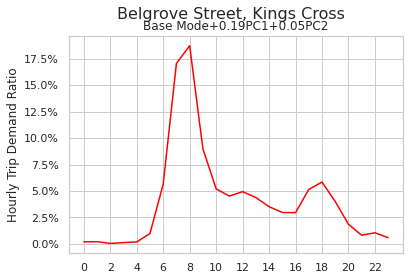

In [127]:
plt.plot(Xhat[13,], color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_1_pc1)+'PC1'+str(pca_df_index_1_pc2)+'PC2', fontsize = 12)
plt.suptitle('Belgrove Street, Kings Cross', fontsize = 16)
plt.show()

#### Waterloo Station 3

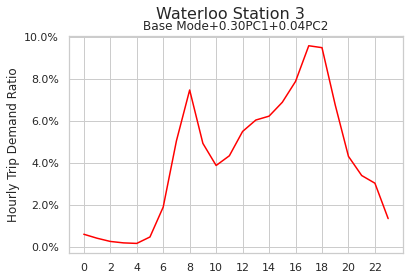

In [128]:
plt.plot(Xhat[146,], color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_2_pc1)+'PC1'+str(pca_df_index_2_pc2)+'PC2', fontsize = 12)
plt.suptitle('Waterloo Station 3', fontsize = 16)
plt.show()

#### Endsleigh Garden, Euston

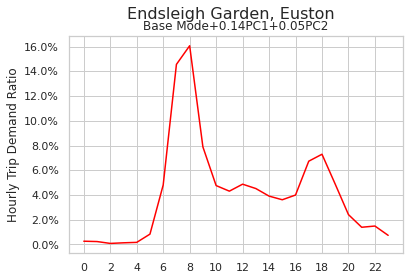

In [129]:
plt.plot(Xhat[204,], color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_3_pc1)+'PC1'+str(pca_df_index_3_pc2)+'PC2', fontsize = 12)
plt.suptitle('Endsleigh Garden, Euston', fontsize = 16)
plt.show()

#### Park Road(Baker Street), The Regent Park

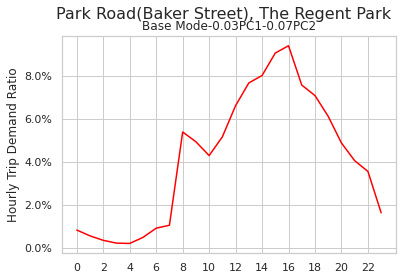

In [130]:
plt.plot(Xhat[109,], color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_4_pc1)+'PC1'+str(pca_df_index_4_pc2)+'PC2', fontsize = 12)
plt.suptitle('Park Road(Baker Street), The Regent Park', fontsize = 16)
plt.show()

#### Hyde Park Corner

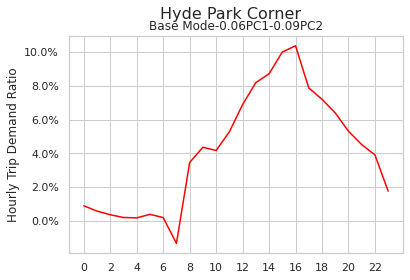

In [131]:
plt.plot(Xhat[183,], color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_5_pc1)+'PC1'+str(pca_df_index_5_pc2)+'PC2', fontsize = 12)
plt.suptitle('Hyde Park Corner', fontsize = 16)
plt.show()

#### Aquatic Centre, Queen Elizabeth Olympic Park

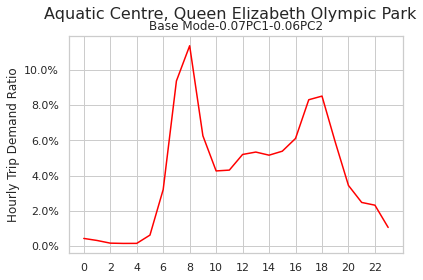

In [132]:
plt.plot(Xhat[697,], color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_6_pc1)+'PC1'+str(pca_df_index_6_pc2)+'PC2', fontsize = 12)
plt.suptitle('Aquatic Centre, Queen Elizabeth Olympic Park', fontsize = 16)
plt.show()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


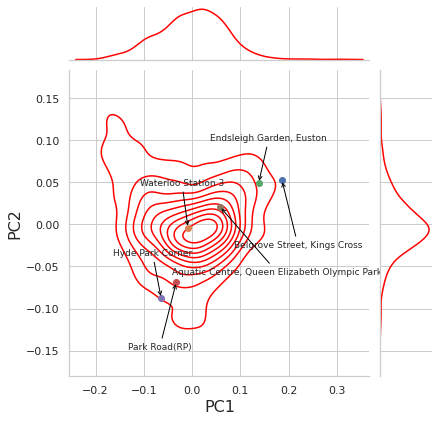

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

pca_df_1_2 = pca_df[['PC1','PC2']]

ind_list = [13,146,204,109,183,697]
pp = pca_df_1_2.iloc[ind_list]
n = ['Belgrove Street, Kings Cross', 'Waterloo Station 3', 'Endsleigh Garden, Euston', 'Park Road(RP)', 'Hyde Park Corner','Aquatic Centre, Queen Elizabeth Olympic Park']
pp['col'] = n

ind_list2 = [13,109,697]
pp2 = pca_df_1_2.iloc[ind_list2]
n2 = ['Belgrove Street, Kings Cross', 'Park Road(RP)', 'Aquatic Centre, Queen Elizabeth Olympic Park']
pp2['col'] = n2

ind_list3 = [146,204,183]
pp3 = pca_df_1_2.iloc[ind_list3]
n3 = ['Waterloo Station 3', 'Endsleigh Garden, Euston', 'Hyde Park Corner']
pp3['col'] = n3

# loading dataset
#color = sns.color_palette()[3]
# draw jointplot with
# kde kind
sns.set(style="whitegrid")
pca_df_1_2 = pca_df[['PC1','PC2']]
g = sns.jointplot(x = "PC1", y = "PC2",
              kind = "kde",data = pca_df_1_2,color ='red')
for i,row in enumerate(pp.values):
    g.ax_joint.plot(row[0], row[1] ,marker='o')

for i, txt in enumerate(pp3.values):
    #g.ax_joint.annotate(txt[2],(txt[0],txt[1]),fontsize=7)
    g.ax_joint.annotate(txt[2], xy=(txt[0], txt[1]), xytext=(txt[0]-0.1, txt[1]+0.05), arrowprops={"arrowstyle":"->", "color":"black"},fontsize=9)
    
for i, txt in enumerate(pp2.values):
    #g.ax_joint.annotate(txt[2],(txt[0],txt[1]),fontsize=7)
    g.ax_joint.annotate(txt[2], xy=(txt[0], txt[1]), xytext=(txt[0]-0.1, txt[1]-0.08), arrowprops={"arrowstyle":"->", "color":"black"},fontsize=9)


g.set_axis_labels('PC1', 'PC2', fontsize=16)

plt.show()

### End Station + weekdays

In [134]:
end_d=filtered_d_frame.drop(labels=['StartStation Name', 'EndStation Name', 'Start Date','Duration','Rental Id','Bike Id','StartStation Id'], axis=1)

In [135]:
#drop weekend
end_d["weekday"] = pd.to_datetime(end_d['End Date']).dt.dayofweek
end_d["hour"] = pd.to_datetime(end_d['End Date']).dt.hour
#start_b
end_wkday_d = end_d.drop(end_d.loc[end_d["weekday"] > 4].index)
end_wkday_d=end_wkday_d.drop(labels=['weekday'], axis=1)
end_wkday_d

,End Date,EndStation Id,hour
0,2020-10-15 08:52:00,97,8
1,2020-10-19 09:12:00,97,9
4,2020-10-15 18:07:00,622,18
8,2020-10-19 16:33:00,622,16
10,2020-10-20 07:02:00,427,7
...,...,...,...
930852,2020-11-13 14:11:00,321,14
930855,2020-11-12 18:32:00,828,18
930856,2020-11-12 20:38:00,828,20
930858,2020-11-13 18:05:00,772,18


In [136]:
end_wkday_d1=end_wkday_d.groupby([pd.Grouper(key='EndStation Id'),end_wkday_d['hour']]).size().reset_index(name='count')
end_wkday_d1['avg_daily_total'] = end_wkday_d1.groupby('EndStation Id')['count'].transform('sum')

# nomalized
end_wkday_d1['r_b'] = end_wkday_d1['count']/end_wkday_d1['avg_daily_total']
end_wkday_d1
#start_wkday_b1.to_csv('start_wkday_b1.csv')

#make pivot in size N(785) station*24
#start_wkday_b1
end_wkday_d2=end_wkday_d1.drop(labels=['count', 'avg_daily_total'], axis=1)

end_wkday_d3=end_wkday_d2.pivot_table(columns='hour', index='EndStation Id', values='r_b').reset_index()
end_wkday_d3.fillna(0)

end_wkday_d3.set_index('EndStation Id', inplace=True)
end_wkday_d3

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
EndStation Id,,,,,,,,,,,,,,,,,,,,,
1,0.0066,NaN,0.0198,NaN,NaN,NaN,NaN,0.0198,0.0462,0.0759,...,0.0297,0.0330,0.0627,0.1155,0.1353,0.1089,0.0660,0.0627,0.0462,0.0132
2,0.0058,0.0016,NaN,0.0025,NaN,NaN,0.0074,0.0313,0.0800,0.0717,...,0.0717,0.0767,0.0866,0.0791,0.0734,0.0536,0.0330,0.0231,0.0107,0.0066
3,0.0073,0.0049,0.0049,0.0024,NaN,NaN,0.0584,0.1849,0.1363,0.1022,...,0.0243,0.0511,0.0365,0.1144,0.0462,0.0414,0.0146,0.0049,NaN,0.0049
4,0.0106,0.0106,0.0053,0.0106,NaN,0.0026,NaN,0.0212,0.0265,0.0265,...,0.0476,0.0741,0.0503,0.0820,0.0979,0.1058,0.0926,0.0423,0.0556,0.0238
5,0.0021,NaN,NaN,0.0007,0.0007,0.0021,0.0271,0.0751,0.1259,0.0772,...,0.0647,0.0772,0.0723,0.0925,0.0737,0.0522,0.0299,0.0160,0.0070,0.0070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,NaN,NaN,NaN,NaN,NaN,NaN,0.0687,0.2103,0.1652,0.1223,...,0.0258,0.0386,0.0451,0.0408,0.0515,0.0258,0.0215,0.0043,0.0129,0.0043
839,0.0020,0.0040,0.0020,0.0020,0.0030,0.0020,0.0257,0.0534,0.1008,0.0731,...,0.0692,0.0613,0.0652,0.0949,0.1097,0.0474,0.0336,0.0543,0.0405,0.0178
840,0.0038,0.0019,0.0066,NaN,0.0075,0.0009,NaN,0.0198,0.0528,0.0236,...,0.0669,0.0584,0.0952,0.1065,0.1414,0.0914,0.0745,0.0443,0.0424,0.0179


In [137]:
# standardisation of the X. This is essential for PCA.
import sys
import numpy
from sklearn.preprocessing import StandardScaler
numpy.set_printoptions(threshold=False)

hour = end_wkday_d3.columns.tolist()
#scaled_data = preprocessing.scale(start_wkday_b3)

#X = StandardScaler().fit_transform(start_wkday_b3)
#pca = PCA(n_components=24)
#rand_st_int = 10 
pca = PCA()
# fit the components
#pca.fit(X)
#X_new_components = pca.fit_transform(X)

end_wkday_d3[np.isnan(end_wkday_d3)] = 0
pca.fit(end_wkday_d3)
X_new_components = pca.fit_transform(end_wkday_d3)
pca_data = pca.transform(end_wkday_d3)

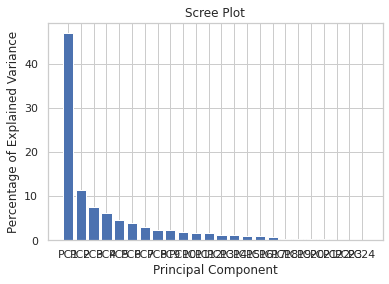

In [138]:
import matplotlib.pyplot as plt

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [139]:
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

print('Eigenvalues of each component:')
print(pca.explained_variance_)

Explained variance ratio of each component:
[4.69007218e-01 1.14975728e-01 7.53662746e-02 ... 1.01271027e-03
 8.69406587e-04 6.09792793e-33]
Eigenvalues of each component:
[5.69835327e-03 1.39693439e-03 9.15686667e-04 ... 1.23042474e-05
 1.05631335e-05 7.40887265e-35]


In [140]:
PCnames = ['PC'+str(i+1) for i in range(pca.n_components_)]
Loadings = pd.DataFrame(pca.components_.transpose(),columns=PCnames,index=hour)

Loadings.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
0,-0.0220,0.0017,-0.0322,-0.0605,0.0291
1,-0.0121,0.0048,-0.0215,-0.0610,0.0006
2,-0.0086,0.0046,-0.0214,-0.0273,-0.0000
3,-0.0042,0.0032,-0.0153,-0.0179,-0.0006
4,-0.0003,0.0005,-0.0000,-0.0151,0.0001
5,0.0128,-0.0168,0.0222,-0.0138,0.0002
6,0.1195,-0.1837,0.1842,-0.1268,-0.0507
7,0.3973,-0.4831,0.4320,-0.3692,-0.2515
8,0.5962,-0.1579,-0.2510,0.3033,0.5989
9,0.3186,0.1562,-0.3115,0.2916,-0.4629


Text(0.5, 1.0, 'PC1(46.90%)')

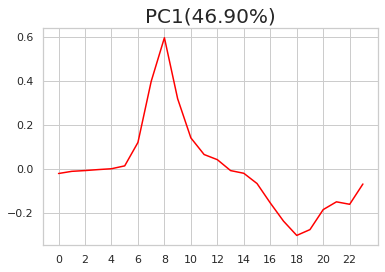

In [141]:
# plt Loadings
Loadings["PC1"].plot(color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC1({:.2f}%)".format(pca.explained_variance_ratio_[0]*100), fontsize = 20)  # add title

Text(0.5, 1.0, 'PC2(11.50%)')

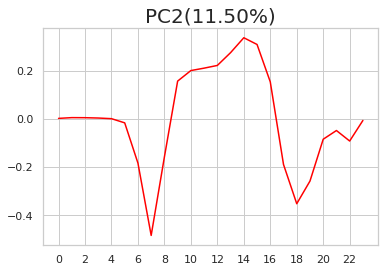

In [142]:
Loadings["PC2"].plot(color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC2({:.2f}%)".format(pca.explained_variance_ratio_[1]*100),fontsize = 20)  # add title

Text(0.5, 1.0, 'PC3(7.54%)')

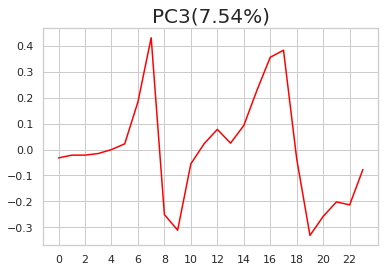

In [143]:
Loadings["PC3"].plot(color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC3({:.2f}%)".format(pca.explained_variance_ratio_[2]*100),fontsize = 20)  # add title

Text(0.5, 1.0, 'PC4(6.17%)')

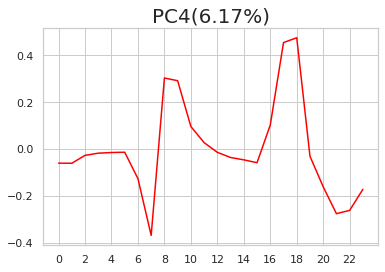

In [144]:
Loadings["PC4"].plot(color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC4({:.2f}%)".format(pca.explained_variance_ratio_[3]*100),fontsize = 20)  # add title

In [145]:
# ## pc1 vs pc2
station = start_wkday_d3.index.tolist()
pca_df = pd.DataFrame(pca_data, index=station, columns=PCnames)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
1,-0.0529,-0.0338,-0.0408,0.0249,-0.0268,-0.0218,-0.0015,-0.0023,-0.0177,-0.0053,...,-0.0025,0.0155,0.0017,0.0025,-0.0045,0.0004,0.0107,-0.0058,-0.0103,0.0000
2,0.0350,0.0628,0.0129,0.0143,-0.0084,0.0073,0.0077,0.0019,-0.0132,0.0020,...,0.0126,-0.0040,-0.0029,0.0003,-0.0040,-0.0005,-0.0004,0.0005,0.0027,0.0000
3,0.1621,-0.0763,0.0636,-0.0107,-0.0427,-0.0305,-0.0123,0.0323,0.0054,0.0105,...,-0.0004,0.0152,0.0105,0.0024,-0.0097,0.0038,0.0005,-0.0017,0.0002,0.0000
4,-0.0626,0.0081,-0.0268,-0.0369,-0.0152,0.0190,-0.0185,0.0184,-0.0026,0.0018,...,-0.0168,-0.0068,-0.0042,0.0072,0.0026,0.0034,0.0029,-0.0033,0.0055,0.0000
5,0.0803,0.0058,0.0241,0.0182,0.0079,0.0021,-0.0015,0.0140,0.0096,0.0049,...,0.0100,-0.0029,-0.0004,-0.0028,-0.0023,-0.0003,-0.0001,0.0007,0.0000,-0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,0.2119,-0.0784,0.0377,-0.0408,-0.0323,-0.0102,0.0209,-0.0094,0.0150,0.0036,...,-0.0174,-0.0013,-0.0092,-0.0057,-0.0073,0.0036,0.0010,-0.0017,0.0003,0.0000
839,0.0287,-0.0136,0.0003,0.0107,0.0086,-0.0123,-0.0179,-0.0272,0.0118,-0.0047,...,0.0120,0.0042,-0.0029,-0.0058,0.0004,0.0022,0.0000,0.0013,-0.0000,0.0000
840,-0.0668,-0.0168,-0.0015,0.0156,0.0192,0.0102,0.0050,-0.0093,-0.0012,-0.0127,...,-0.0038,0.0105,-0.0012,-0.0019,0.0012,0.0013,0.0030,0.0049,-0.0054,-0.0000
841,-0.0710,-0.0175,-0.0171,-0.0158,0.0295,-0.0187,0.0235,-0.0038,0.0261,0.0085,...,-0.0035,0.0105,0.0018,-0.0030,-0.0009,-0.0023,-0.0004,0.0057,0.0015,0.0000


### 6 stations' Top 2 PCs

In [146]:
#pca_df_index_1 = pca_df_index.loc[pca_df_index['index'] == 14]
#pca_df_index_1['PC1']

#KC
pca_df_index_1_pc1 = pca_df.loc[pca_df.index == 14, "PC1"]
pca_df_index_1_pc1 = float("{0:+.2f}".format(pca_df_index_1_pc1.to_list()[0]))
pca_df_index_1_pc1 = "%+.2f" % (pca_df_index_1_pc1)
pca_df_index_1_pc2 = pca_df.loc[pca_df.index == 14, "PC2"]
pca_df_index_1_pc2 = float("{0:+.2f}".format(pca_df_index_1_pc2.to_list()[0]))
pca_df_index_1_pc2 = "%+.2f" % (pca_df_index_1_pc2)

#Waterloo
pca_df_index_2_pc1 = pca_df.loc[pca_df.index == 154, "PC1"]
pca_df_index_2_pc1 = float("{0:+.2f}".format(pca_df_index_2_pc1.to_list()[0]))
pca_df_index_2_pc1 = "%+.2f" % (pca_df_index_2_pc1)
pca_df_index_2_pc2 = pca_df.loc[pca_df.index == 154, "PC2"]
pca_df_index_2_pc2 = float("{0:+.2f}".format(pca_df_index_2_pc2.to_list()[0]))
pca_df_index_2_pc2 = "%+.2f" % (pca_df_index_2_pc2)

#Euston
pca_df_index_3_pc1 = pca_df.loc[pca_df.index == 214, "PC1"]
pca_df_index_3_pc1 = float("{0:+.2f}".format(pca_df_index_3_pc1.to_list()[0]))
pca_df_index_3_pc1 = "%+.2f" % (pca_df_index_3_pc1)
pca_df_index_3_pc2 = pca_df.loc[pca_df.index == 214, "PC2"]
pca_df_index_3_pc2 = float("{0:+.2f}".format(pca_df_index_3_pc2.to_list()[0]))
pca_df_index_3_pc2 = "%+.2f" % (pca_df_index_3_pc2)

#RP
pca_df_index_4_pc1 = pca_df.loc[pca_df.index == 114, "PC1"]
pca_df_index_4_pc1 = float("{0:+.2f}".format(pca_df_index_4_pc1.to_list()[0]))
pca_df_index_4_pc1 = "%+.2f" % (pca_df_index_4_pc1)
pca_df_index_4_pc2 = pca_df.loc[pca_df.index == 114, "PC2"]
pca_df_index_4_pc2 = float("{0:+.2f}".format(pca_df_index_4_pc2.to_list()[0]))
pca_df_index_4_pc2 = "%+.2f" % (pca_df_index_4_pc2)

#Hyde Park
pca_df_index_5_pc1 = pca_df.loc[pca_df.index == 191, "PC1"]
pca_df_index_5_pc1 = float("{0:+.2f}".format(pca_df_index_5_pc1.to_list()[0]))
pca_df_index_5_pc1 = "%+.2f" % (pca_df_index_5_pc1)
pca_df_index_5_pc2 = pca_df.loc[pca_df.index == 191, "PC2"]
pca_df_index_5_pc2 = float("{0:+.2f}".format(pca_df_index_5_pc2.to_list()[0]))
pca_df_index_5_pc2 = "%+.2f" % (pca_df_index_5_pc2)

#QEOP
pca_df_index_6_pc1 = pca_df.loc[pca_df.index == 785, "PC1"]
pca_df_index_6_pc1 = float("{0:+.2f}".format(pca_df_index_6_pc1.to_list()[0]))
pca_df_index_6_pc1 = "%+.2f" % (pca_df_index_6_pc1)
pca_df_index_6_pc2 = pca_df.loc[pca_df.index == 785, "PC2"]
pca_df_index_6_pc2 = float("{0:+.2f}".format(pca_df_index_6_pc2.to_list()[0]))
pca_df_index_6_pc2 = "%+.2f" % (pca_df_index_6_pc2)


### Reconstructed 6 Stations

In [147]:
import numpy as np
import sklearn.datasets, sklearn.decomposition

mu = np.mean(end_wkday_d3, axis=0)

pca_r = sklearn.decomposition.PCA()
pca_r.fit(end_wkday_d3)

nComp = 2
Xhat = np.dot(pca_r.transform(end_wkday_d3)[:,:nComp], pca_r.components_[:nComp,:])
Xhat += mu

print(Xhat[14,])
print(Xhat[14,])

[0.00548305 0.0038439  0.0027261  ... 0.02173866 0.01934136 0.01248712]
[0.00548305 0.0038439  0.0027261  ... 0.02173866 0.01934136 0.01248712]


#### Belgrove Street, King's Cross

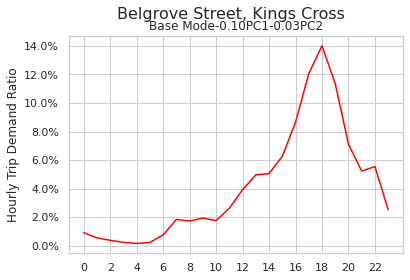

In [148]:
plt.plot(Xhat[13,], color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_1_pc1)+'PC1'+str(pca_df_index_1_pc2)+'PC2', fontsize = 12)
plt.suptitle('Belgrove Street, Kings Cross', fontsize = 16)
plt.show()

#### Waterloo Station 3

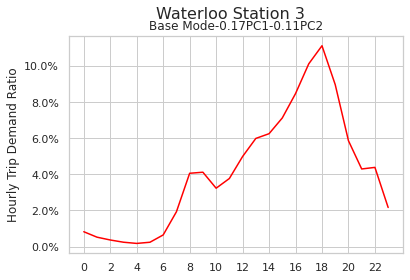

In [149]:
plt.plot(Xhat[146,], color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_2_pc1)+'PC1'+str(pca_df_index_2_pc2)+'PC2', fontsize = 12)
plt.suptitle('Waterloo Station 3', fontsize = 16)
plt.show()

#### Endsleigh Garden, Euston

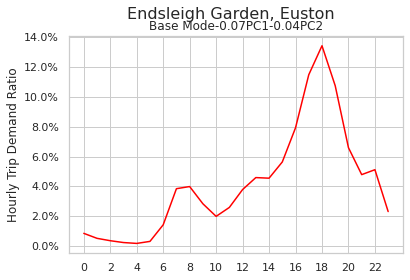

In [150]:
plt.plot(Xhat[204,], color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_3_pc1)+'PC1'+str(pca_df_index_3_pc2)+'PC2', fontsize = 12)
plt.suptitle('Endsleigh Garden, Euston', fontsize = 16)
plt.show()

#### Park Road(Baker Street), The Regent Park

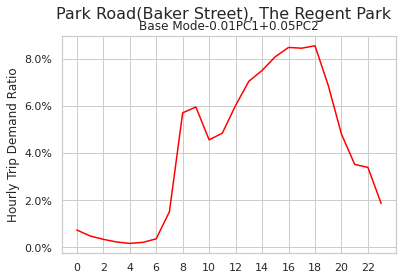

In [151]:
plt.plot(Xhat[109,], color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_4_pc1)+'PC1'+str(pca_df_index_4_pc2)+'PC2', fontsize = 12)
plt.suptitle('Park Road(Baker Street), The Regent Park', fontsize = 16)
plt.show()

#### Hyde Park Corner

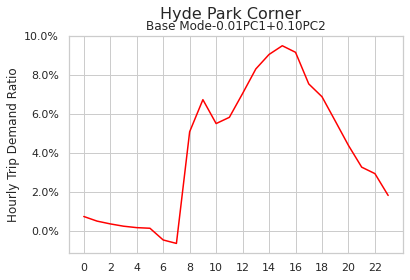

In [152]:
plt.plot(Xhat[183,], color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_5_pc1)+'PC1'+str(pca_df_index_5_pc2)+'PC2', fontsize = 12)
plt.suptitle('Hyde Park Corner', fontsize = 16)
plt.show()

#### Aquatic Centre, Queen Elizabeth Olympic Park

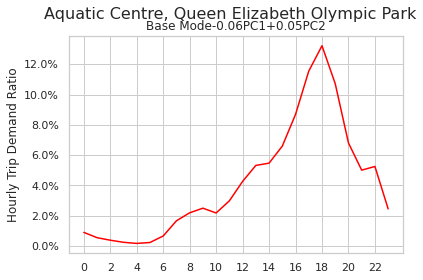

In [153]:
plt.plot(Xhat[697,], color = 'red')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_6_pc1)+'PC1'+str(pca_df_index_6_pc2)+'PC2', fontsize =12)
plt.suptitle('Aquatic Centre, Queen Elizabeth Olympic Park', fontsize = 16)
plt.show()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


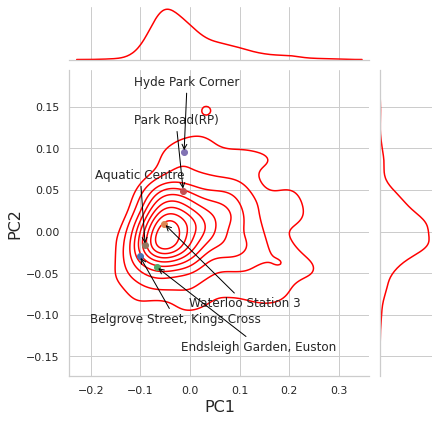

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

pca_df_1_2 = pca_df[['PC1','PC2']]

ind_list = [13,146,204,109,183,697]
pp = pca_df_1_2.iloc[ind_list]
n = ['Belgrove Street, Kings Cross', 'Waterloo Station 3', 'Endsleigh Garden, Euston', 'Park Road(RP)', 'Hyde Park Corner','Aquatic Centre']
pp['col'] = n

ind_list2 = [109,183,697]
pp2 = pca_df_1_2.iloc[ind_list2]
n2 = ['Park Road(RP)', 'Hyde Park Corner','Aquatic Centre']
pp2['col'] = n2

ind_list3 = [13]
pp3 = pca_df_1_2.iloc[ind_list3]
n3 = ['Belgrove Street, Kings Cross']
pp3['col'] = n3

ind_list4 = [146,204]
pp4 = pca_df_1_2.iloc[ind_list4]
n4 = ['Waterloo Station 3','Endsleigh Garden, Euston']
pp4['col'] = n4

# loading dataset
#color = sns.color_palette()[3]
# draw jointplot with
# kde kind
sns.set(style="whitegrid")
pca_df_1_2 = pca_df[['PC1','PC2']]
g = sns.jointplot(x = "PC1", y = "PC2",
              kind = "kde",data = pca_df_1_2,color ='red')
for i,row in enumerate(pp.values):
    g.ax_joint.plot(row[0], row[1] ,marker='o')

for i, txt in enumerate(pp2.values):
    #g.ax_joint.annotate(txt[2],(txt[0],txt[1]),fontsize=7)
    g.ax_joint.annotate(txt[2], xy=(txt[0], txt[1]), xytext=(txt[0]-0.1, txt[1]+0.08), arrowprops={"arrowstyle":"->", "color":"black"},fontsize=12)
    
for i, txt in enumerate(pp3.values):
    #g.ax_joint.annotate(txt[2],(txt[0],txt[1]),fontsize=7)
    g.ax_joint.annotate(txt[2], xy=(txt[0], txt[1]), xytext=(txt[0]-0.1, txt[1]-0.08), arrowprops={"arrowstyle":"->", "color":"black"},fontsize=12)
    
for i, txt in enumerate(pp4.values):
    #g.ax_joint.annotate(txt[2],(txt[0],txt[1]),fontsize=7)
    g.ax_joint.annotate(txt[2], xy=(txt[0], txt[1]), xytext=(txt[0]+0.05, txt[1]-0.1), arrowprops={"arrowstyle":"->", "color":"black"},fontsize=12)


g.set_axis_labels('PC1', 'PC2', fontsize=16)

plt.show()

## After Data

In [4]:
import glob
import os

after_path = osp.join(osp.dirname(osp.realpath("__file__")),'data','After') # Before Path
all_after_files = glob.glob(after_path + "/*.csv")

lia = []

for filename in all_after_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    lia.append(df)

after_frame = pd.concat(lia, axis=0, ignore_index=True)
after_frame['Start Date'] = pd.to_datetime(after_frame['Start Date'], format="%d/%m/%Y %H:%M")
after_frame['End Date'] = pd.to_datetime(after_frame['End Date'], format="%d/%m/%Y %H:%M")

#after_frame
filtered_a_frame = after_frame.loc[(after_frame['Start Date'] > '2021-10-14 23:59:00')
                     & (after_frame['Start Date'] < '2021-11-16 00:00:00')]

filtered_a_frame

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,113856950,240,12953,2021-10-19 13:10:00,605,"Seymour Place, Marylebone",2021-10-19 13:06:00,99,"Old Quebec Street, Marylebone"
2,113775911,300,17398,2021-10-16 23:48:00,310,"Black Prince Road, Vauxhall",2021-10-16 23:43:00,149,"Kennington Road Post Office, Oval"
3,113875813,1200,20315,2021-10-19 20:52:00,14,"Belgrove Street , King's Cross",2021-10-19 20:32:00,541,"Green Park Station, Mayfair"
4,113867536,1380,20233,2021-10-19 18:11:00,228,"St. James's Square, St. James's",2021-10-19 17:48:00,773,"Tallis Street, Temple"
5,113719461,720,13517,2021-10-15 15:03:00,624,"Courland Grove, Wandsworth Road",2021-10-15 14:51:00,440,"Kennington Oval, Oval"
...,...,...,...,...,...,...,...,...,...
1193700,114742579,2760,21209,2021-11-13 22:06:00,228,"St. James's Square, St. James's",2021-11-13 21:20:00,296,"Knaresborough Place, Earl's Court"
1193701,114709279,60,21351,2021-11-12 23:36:00,155,"Lexham Gardens, Kensington",2021-11-12 23:35:00,296,"Knaresborough Place, Earl's Court"
1193703,114700079,240,9409,2021-11-12 17:44:00,405,"Gloucester Road Station, South Kensington",2021-11-12 17:40:00,296,"Knaresborough Place, Earl's Court"
1193704,114672074,540,20741,2021-11-11 18:56:00,428,"Exhibition Road, Knightsbridge",2021-11-11 18:47:00,296,"Knaresborough Place, Earl's Court"


### Start Station + weekdays

In [5]:
start_a=filtered_a_frame.drop(labels=['StartStation Name', 'EndStation Name', 'End Date','Duration','Rental Id','Bike Id','EndStation Id'], axis=1)

#drop weekend
start_a["weekday"] = pd.to_datetime(start_a['Start Date']).dt.dayofweek
start_a["hour"] = pd.to_datetime(start_a['Start Date']).dt.hour
#start_b
start_wkday_a = start_a.drop(start_a.loc[start_a["weekday"] > 4].index)
start_wkday_a=start_wkday_a.drop(labels=['weekday'], axis=1)
start_wkday_a

,Start Date,StartStation Id,hour
0,2021-10-19 13:06:00,99,13
3,2021-10-19 20:32:00,541,20
4,2021-10-19 17:48:00,773,17
5,2021-10-15 14:51:00,440,14
11,2021-10-15 14:48:00,149,14
...,...,...,...
1193695,2021-11-11 19:22:00,296,19
1193696,2021-11-11 19:08:00,296,19
1193701,2021-11-12 23:35:00,296,23
1193703,2021-11-12 17:40:00,296,17


In [6]:
start_wkday_a1=start_wkday_a.groupby([pd.Grouper(key='StartStation Id'),start_wkday_a['hour']]).size().reset_index(name='count')
start_wkday_a1['avg_daily_total'] = start_wkday_a1.groupby('StartStation Id')['count'].transform('sum')
print(start_wkday_a1)
# nomalized
start_wkday_a1['r_b'] = start_wkday_a1['count']/start_wkday_a1['avg_daily_total']
start_wkday_a1

       StartStation Id  hour  count  avg_daily_total
0                    1     0      2              553
1                    1     2      1              553
2                    1     4      1              553
3                    1     6     25              553
4                    1     7     59              553
...                ...   ...    ...              ...
17637              845    19     53              890
17638              845    20     59              890
17639              845    21     39              890
17640              845    22     30              890
17641              845    23     16              890

[17642 rows x 4 columns]


,StartStation Id,hour,count,avg_daily_total,r_b
0,1,0,2,553,0.0036
1,1,2,1,553,0.0018
2,1,4,1,553,0.0018
3,1,6,25,553,0.0452
4,1,7,59,553,0.1067
...,...,...,...,...,...
17637,845,19,53,890,0.0596
17638,845,20,59,890,0.0663
17639,845,21,39,890,0.0438
17640,845,22,30,890,0.0337


Text(0.5, 1.0, 'Base Mode - After Pandemic')

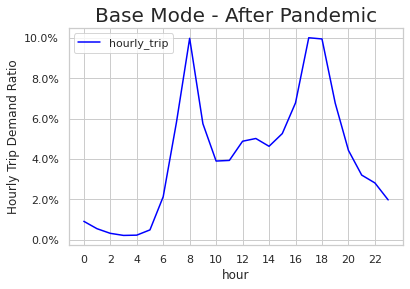

In [28]:
#hourly trips in total
start_wkday_a1_total=start_wkday_a1.drop(labels=['StartStation Id', 'avg_daily_total'], axis=1)
start_wkday_a1_total['countintotal'] = start_wkday_a1_total.groupby('hour')['count'].transform('sum')
start_wkday_a1_total=start_wkday_a1_total.drop_duplicates(subset='hour')
#start_wkday_b1_total.set_index('hour', inplace=True)
start_wkday_a1_total=start_wkday_a1_total.sort_values("hour")
start_wkday_a1_total.set_index('hour', inplace=True)
start_wkday_a1_total=start_wkday_a1_total.drop(labels=['count'], axis=1)

start_wkday_a1_total['total'] = start_wkday_a1_total['countintotal'].sum()
start_wkday_a1_total['hourly_trip'] = start_wkday_a1_total['countintotal']/start_wkday_a1_total['total']
start_wkday_a1_total = start_wkday_a1_total.drop(labels=['countintotal','total','r_b'], axis=1)

import matplotlib.ticker as mtick

start_wkday_a1_total.plot(color="blue")
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')
plt.title('Base Mode - After Pandemic', fontsize = 20)


In [8]:
#make pivot in size N(785) station*24
#start_wkday_b1
start_wkday_a2=start_wkday_a1.drop(labels=['count', 'avg_daily_total'], axis=1)

start_wkday_a3=start_wkday_a2.pivot_table(columns='hour', index='StartStation Id', values='r_b').reset_index()
start_wkday_a3.fillna(0)

start_wkday_a3.set_index('StartStation Id', inplace=True)
start_wkday_a3

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
StartStation Id,,,,,,,,,,,,,,,,,,,,,
1,0.0036,NaN,0.0018,NaN,0.0018,NaN,0.0452,0.1067,0.1410,0.0958,...,0.0344,0.0506,0.0488,0.0579,0.0615,0.0452,0.0181,0.0145,0.0217,0.0145
2,0.0024,0.0024,NaN,0.0008,0.0008,0.0008,0.0171,0.0244,0.0854,0.0464,...,0.0716,0.0740,0.0724,0.1009,0.0797,0.0610,0.0448,0.0138,0.0163,0.0130
3,0.0152,0.0101,0.0127,NaN,0.0013,NaN,0.0063,0.0241,0.0911,0.0278,...,0.0304,0.0405,0.0949,0.1886,0.1165,0.0646,0.0405,0.0342,0.0291,0.0241
4,0.0104,NaN,NaN,0.0042,NaN,NaN,NaN,0.0270,0.0728,0.1164,...,0.0707,0.0437,0.0478,0.0790,0.0520,0.0582,0.0395,0.0333,0.0187,0.0208
5,0.0065,0.0037,0.0005,NaN,0.0009,0.0009,0.0130,0.0384,0.0759,0.0426,...,0.0546,0.0569,0.0777,0.1217,0.1333,0.0828,0.0375,0.0278,0.0287,0.0204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,0.0017,0.0061,0.0043,0.0009,0.0122,0.0217,0.0095,0.0825,0.1623,0.0616,...,0.0347,0.0391,0.0460,0.1111,0.0851,0.0408,0.0495,0.0278,0.0278,0.0104
841,0.0087,0.0029,0.0039,0.0010,0.0039,0.0010,0.0309,0.1061,0.1649,0.0887,...,0.0289,0.0405,0.0579,0.0743,0.0723,0.0665,0.0627,0.0183,0.0135,0.0251
842,0.0144,0.0168,0.0192,0.0024,0.0032,0.0008,0.0248,0.0216,0.0671,0.0448,...,0.0384,0.0472,0.0775,0.0919,0.1215,0.0991,0.0504,0.0352,0.0448,0.0328


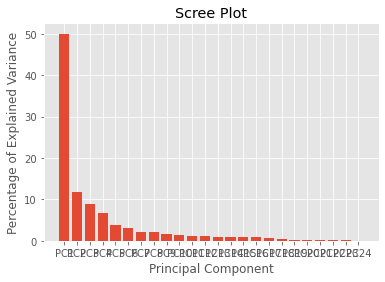

In [9]:
# standardisation of the X. This is essential for PCA.
import sys
import numpy
from sklearn.preprocessing import StandardScaler
numpy.set_printoptions(threshold=False)

hour = start_wkday_a3.columns.tolist()
from sklearn.decomposition import PCA
#rand_st_int = 10 
pca = PCA()
# fit the components
#pca.fit(X)
#X_new_components = pca.fit_transform(X)

start_wkday_a3[np.isnan(start_wkday_a3)] = 0
pca.fit(start_wkday_a3)
X_new_components = pca.fit_transform(start_wkday_a3)
pca_data = pca.transform(start_wkday_a3)

import matplotlib.pyplot as plt

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [10]:
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[4.99836653e-01 1.19331443e-01 8.90046128e-02 ... 1.03302384e-03
 7.28202827e-04 3.84147414e-33]


In [11]:
print('Eigenvalues of each component:')
print(pca.explained_variance_)

Eigenvalues of each component:
[6.52846617e-03 1.55861177e-03 1.16250699e-03 ... 1.34925303e-05
 9.51120230e-06 5.01742595e-35]


In [12]:
PCnames = ['PC'+str(i+1) for i in range(pca.n_components_)]
Loadings = pd.DataFrame(pca.components_.transpose(),columns=PCnames,index=hour)

Loadings.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
0,-0.0138,-0.0300,-0.0724,-0.0335,0.0234
1,-0.0117,-0.0208,-0.0441,-0.0280,0.0212
2,-0.0064,-0.0144,-0.0244,-0.0099,0.0139
3,-0.0005,-0.0108,-0.0151,-0.0088,0.0222
4,0.0082,-0.0070,-0.0062,-0.0040,0.0199
5,0.0332,0.0051,-0.0249,0.0207,-0.0087
6,0.1455,0.0999,-0.0557,0.0600,-0.0505
7,0.4351,0.5138,-0.3007,0.5818,-0.0626
8,0.6145,0.1403,0.3762,-0.4746,0.3961
9,0.2183,-0.1805,0.1900,-0.1301,-0.6151


Text(0.5, 1.0, 'PC1(49.98%)')

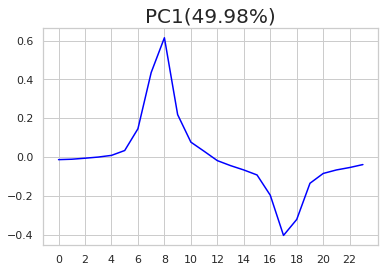

In [29]:
# plt Loadings
Loadings["PC1"].plot(color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC1({:.2f}%)".format(pca.explained_variance_ratio_[0]*100),fontsize = 20)  # add title

Text(0.5, 1.0, 'PC2(11.93%)')

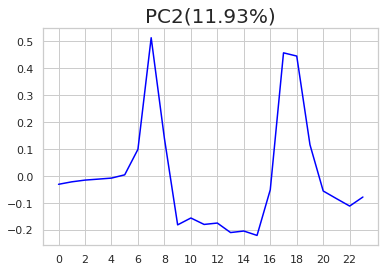

In [30]:
Loadings["PC2"].plot(color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC2({:.2f}%)".format(pca.explained_variance_ratio_[1]*100),fontsize = 20)  # add title

Text(0.5, 1.0, 'PC3(8.90%)')

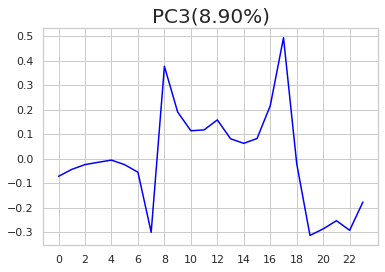

In [31]:
Loadings["PC3"].plot(color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC3({:.2f}%)".format(pca.explained_variance_ratio_[2]*100),fontsize = 20)  # add title

Text(0.5, 1.0, 'PC4(6.83%)')

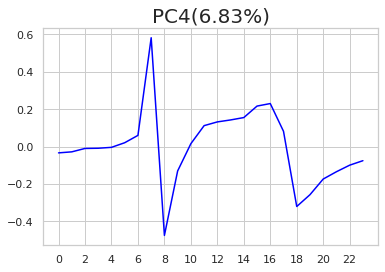

In [32]:
Loadings["PC4"].plot(color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC4({:.2f}%)".format(pca.explained_variance_ratio_[3]*100),fontsize = 20)  # add title

In [33]:
# ## pc1 vs pc2
station = start_wkday_a3.index.tolist()
pca_df = pd.DataFrame(pca_data, index=station, columns=PCnames)
#pca_df.to_csv("afterpca.csv")

### 6 stations' Top 2 PCs

In [34]:
#pca_df_index_1 = pca_df_index.loc[pca_df_index['index'] == 14]
#pca_df_index_1['PC1']

#KC
pca_df_index_1_pc1 = pca_df.loc[pca_df.index == 14, "PC1"]
pca_df_index_1_pc1 = float("{0:+.2f}".format(pca_df_index_1_pc1.to_list()[0]))
pca_df_index_1_pc1 = "%+.2f" % (pca_df_index_1_pc1)
pca_df_index_1_pc2 = pca_df.loc[pca_df.index == 14, "PC2"]
pca_df_index_1_pc2 = float("{0:+.2f}".format(pca_df_index_1_pc2.to_list()[0]))
pca_df_index_1_pc2 = "%+.2f" % (pca_df_index_1_pc2)

#Waterloo
pca_df_index_2_pc1 = pca_df.loc[pca_df.index == 154, "PC1"]
pca_df_index_2_pc1 = float("{0:+.2f}".format(pca_df_index_2_pc1.to_list()[0]))
pca_df_index_2_pc1 = "%+.2f" % (pca_df_index_2_pc1)
pca_df_index_2_pc2 = pca_df.loc[pca_df.index == 154, "PC2"]
pca_df_index_2_pc2 = float("{0:+.2f}".format(pca_df_index_2_pc2.to_list()[0]))
pca_df_index_2_pc2 = "%+.2f" % (pca_df_index_2_pc2)

#Euston
pca_df_index_3_pc1 = pca_df.loc[pca_df.index == 214, "PC1"]
pca_df_index_3_pc1 = float("{0:+.2f}".format(pca_df_index_3_pc1.to_list()[0]))
pca_df_index_3_pc1 = "%+.2f" % (pca_df_index_3_pc1)
pca_df_index_3_pc2 = pca_df.loc[pca_df.index == 214, "PC2"]
pca_df_index_3_pc2 = float("{0:+.2f}".format(pca_df_index_3_pc2.to_list()[0]))
pca_df_index_3_pc2 = "%+.2f" % (pca_df_index_3_pc2)

#RP
pca_df_index_4_pc1 = pca_df.loc[pca_df.index == 114, "PC1"]
pca_df_index_4_pc1 = float("{0:+.2f}".format(pca_df_index_4_pc1.to_list()[0]))
pca_df_index_4_pc1 = "%+.2f" % (pca_df_index_4_pc1)
pca_df_index_4_pc2 = pca_df.loc[pca_df.index == 114, "PC2"]
pca_df_index_4_pc2 = float("{0:+.2f}".format(pca_df_index_4_pc2.to_list()[0]))
pca_df_index_4_pc2 = "%+.2f" % (pca_df_index_4_pc2)

#Hyde Park
pca_df_index_5_pc1 = pca_df.loc[pca_df.index == 191, "PC1"]
pca_df_index_5_pc1 = float("{0:+.2f}".format(pca_df_index_5_pc1.to_list()[0]))
pca_df_index_5_pc1 = "%+.2f" % (pca_df_index_5_pc1)
pca_df_index_5_pc2 = pca_df.loc[pca_df.index == 191, "PC2"]
pca_df_index_5_pc2 = float("{0:+.2f}".format(pca_df_index_5_pc2.to_list()[0]))
pca_df_index_5_pc2 = "%+.2f" % (pca_df_index_5_pc2)

#QEOP
pca_df_index_6_pc1 = pca_df.loc[pca_df.index == 785, "PC1"]
pca_df_index_6_pc1 = float("{0:+.2f}".format(pca_df_index_6_pc1.to_list()[0]))
pca_df_index_6_pc1 = "%+.2f" % (pca_df_index_6_pc1)
pca_df_index_6_pc2 = pca_df.loc[pca_df.index == 785, "PC2"]
pca_df_index_6_pc2 = float("{0:+.2f}".format(pca_df_index_6_pc2.to_list()[0]))
pca_df_index_6_pc2 = "%+.2f" % (pca_df_index_6_pc2)


### Reconstructed 6 Stations

In [35]:
import numpy as np
import sklearn.datasets, sklearn.decomposition

mu = np.mean(start_wkday_a3, axis=0)

pca_r = sklearn.decomposition.PCA()
pca_r.fit(start_wkday_a3)

nComp = 2
Xhat = np.dot(pca_r.transform(start_wkday_a3)[:,:nComp], pca_r.components_[:nComp,:])
Xhat += mu

print(Xhat[14,])
print(Xhat[14,])

[0.0109885  0.00694643 0.00413477 ... 0.03903174 0.0348301  0.0244131 ]
[0.0109885  0.00694643 0.00413477 ... 0.03903174 0.0348301  0.0244131 ]


#### Belgrove Street, King's Cross

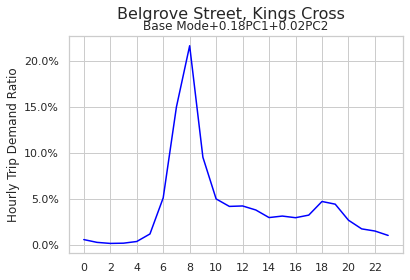

In [36]:
plt.plot(Xhat[13,], color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_1_pc1)+'PC1'+str(pca_df_index_1_pc2)+'PC2', fontsize = 12)
plt.suptitle('Belgrove Street, Kings Cross', fontsize = 16)
plt.show()

#### Waterloo Station 3

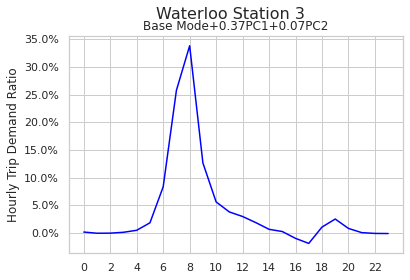

In [37]:
plt.plot(Xhat[144,], color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_2_pc1)+'PC1'+str(pca_df_index_2_pc2)+'PC2', fontsize = 12)
plt.suptitle('Waterloo Station 3', fontsize = 16)
plt.show()

#### Endsleigh Garden, Euston

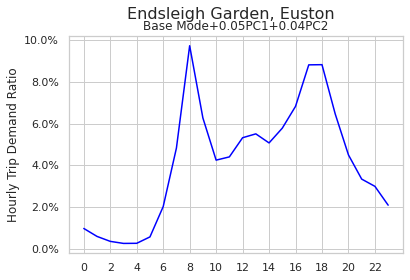

In [38]:
plt.plot(Xhat[191,], color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_3_pc1)+'PC1'+str(pca_df_index_3_pc2)+'PC2', fontsize = 12)
plt.suptitle('Endsleigh Garden, Euston', fontsize = 16)
plt.show()

#### Park Road(Baker Street), The Regent Park

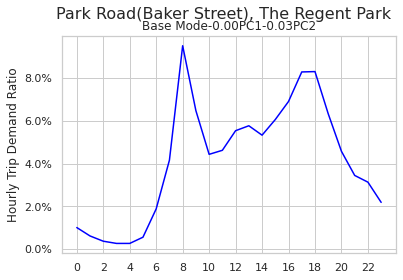

In [39]:
plt.plot(Xhat[106,], color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_4_pc1)+'PC1'+str(pca_df_index_4_pc2)+'PC2', fontsize = 12)
plt.suptitle('Park Road(Baker Street), The Regent Park', fontsize = 16)
plt.show()

#### Hyde Park Corner

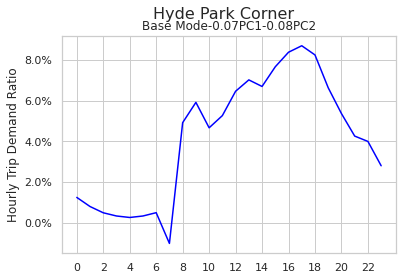

In [40]:
plt.plot(Xhat[178,], color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_5_pc1)+'PC1'+str(pca_df_index_5_pc2)+'PC2', fontsize = 12)
plt.suptitle('Hyde Park Corner', fontsize = 16)
plt.show()

#### Aquatic Centre, Queen Elizabeth Olympic Park

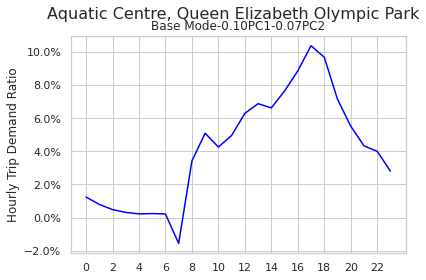

In [41]:
plt.plot(Xhat[734,], color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_6_pc1)+'PC1'+str(pca_df_index_6_pc2)+'PC2', fontsize = 12)
plt.suptitle('Aquatic Centre, Queen Elizabeth Olympic Park', fontsize = 16)
plt.show()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


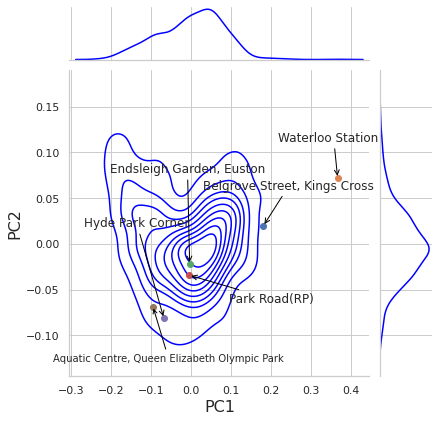

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

pca_df_1_2 = pca_df[['PC1','PC2']]

ind_list = [13,144,191,106,178,734]
pp = pca_df_1_2.iloc[ind_list]
n = ['Belgrove Street, Kings Cross', 'Waterloo Station 3', 'Endsleigh Garden, Euston', 'Park Road(RP)', 'Hyde Park Corner','Aquatic Centre, Queen Elizabeth Olympic Park']
pp['col'] = n

ind_list2 = [13,144]
pp2 = pca_df_1_2.iloc[ind_list2]
n2 = ['Belgrove Street, Kings Cross', 'Waterloo Station 3']
pp2['col'] = n2

ind_list3 = [191,178]
pp3 = pca_df_1_2.iloc[ind_list3]
n3 = ['Endsleigh Garden, Euston',  'Hyde Park Corner']
pp3['col'] = n3

ind_list4 = [106]
pp4 = pca_df_1_2.iloc[ind_list4]
n4 = ['Park Road(RP)']
pp4['col'] = n4

ind_list5 = [734]
pp5 = pca_df_1_2.iloc[ind_list5]
n5 = ['Aquatic Centre, Queen Elizabeth Olympic Park']
pp5['col'] = n5

# loading dataset
#color = sns.color_palette()[3]
# draw jointplot with
# kde kind
sns.set(style="whitegrid")
pca_df_1_2 = pca_df[['PC1','PC2']]
g = sns.jointplot(x = "PC1", y = "PC2",
              kind = "kde",data = pca_df_1_2,color ='blue')
for i,row in enumerate(pp.values):
    g.ax_joint.plot(row[0], row[1] ,marker='o')

for i, txt in enumerate(pp2.values):
    #g.ax_joint.annotate(txt[2],(txt[0],txt[1]),fontsize=7)
    g.ax_joint.annotate(txt[2], xy=(txt[0], txt[1]), xytext=(txt[0]-0.15, txt[1]+0.04), arrowprops={"arrowstyle":"->", "color":"black"},fontsize=12)
for i, txt in enumerate(pp3.values):
    #g.ax_joint.annotate(txt[2],(txt[0],txt[1]),fontsize=7)
    g.ax_joint.annotate(txt[2], xy=(txt[0], txt[1]), xytext=(txt[0]-0.2, txt[1]+0.1), arrowprops={"arrowstyle":"->", "color":"black"},fontsize=12)
for i, txt in enumerate(pp4.values):
    #g.ax_joint.annotate(txt[2],(txt[0],txt[1]),fontsize=7)
    g.ax_joint.annotate(txt[2], xy=(txt[0], txt[1]), xytext=(txt[0]+0.1, txt[1]-0.03), arrowprops={"arrowstyle":"->", "color":"black"},fontsize=12)
for i, txt in enumerate(pp5.values):
    #g.ax_joint.annotate(txt[2],(txt[0],txt[1]),fontsize=7)
    g.ax_joint.annotate(txt[2], xy=(txt[0], txt[1]), xytext=(txt[0]-0.25, txt[1]-0.06), arrowprops={"arrowstyle":"->", "color":"black"},fontsize=10)



g.set_axis_labels('PC1', 'PC2', fontsize=16)

plt.show()

### End Station + weekdays

In [59]:
end_a=filtered_a_frame.drop(labels=['StartStation Name', 'EndStation Name', 'Start Date','Duration','Rental Id','Bike Id','StartStation Id'], axis=1)

#drop weekend
end_a["weekday"] = pd.to_datetime(end_a['End Date']).dt.dayofweek
end_a["hour"] = pd.to_datetime(end_a['End Date']).dt.hour
#start_b
end_wkday_a = end_a.drop(end_a.loc[end_a["weekday"] > 4].index)
end_wkday_a=end_wkday_a.drop(labels=['weekday'], axis=1)
end_wkday_a

,End Date,EndStation Id,hour
0,2021-10-19 13:10:00,605,13
3,2021-10-19 20:52:00,14,20
4,2021-10-19 18:11:00,228,18
5,2021-10-15 15:03:00,624,15
11,2021-10-15 14:50:00,440,14
...,...,...,...
1193695,2021-11-11 19:26:00,405,19
1193696,2021-11-11 19:17:00,739,19
1193701,2021-11-12 23:36:00,155,23
1193703,2021-11-12 17:44:00,405,17


In [60]:
end_wkday_a1=end_wkday_a.groupby([pd.Grouper(key='EndStation Id'),end_wkday_a['hour']]).size().reset_index(name='count')
end_wkday_a1['avg_daily_total'] = end_wkday_a1.groupby('EndStation Id')['count'].transform('sum')

# nomalized
end_wkday_a1['r_b'] = end_wkday_a1['count']/end_wkday_a1['avg_daily_total']
end_wkday_a1
#start_wkday_b1.to_csv('start_wkday_b1.csv')

#make pivot in size N(785) station*24
#start_wkday_b1
end_wkday_a2=end_wkday_a1.drop(labels=['count', 'avg_daily_total'], axis=1)

end_wkday_a3=end_wkday_a2.pivot_table(columns='hour', index='EndStation Id', values='r_b').reset_index()
end_wkday_a3.fillna(0)

end_wkday_a3.set_index('EndStation Id', inplace=True)
end_wkday_a3

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
EndStation Id,,,,,,,,,,,,,,,,,,,,,
1,0.0227,0.0057,0.0028,NaN,NaN,NaN,NaN,0.0057,0.0341,0.0227,...,0.0540,0.0710,0.0710,0.1534,0.1506,0.0994,0.0540,0.0284,0.0625,0.0312
2,0.0024,0.0056,0.0048,NaN,NaN,0.0064,0.0247,0.0407,0.0774,0.0942,...,0.0742,0.0551,0.0630,0.0750,0.0894,0.0495,0.0215,0.0128,0.0072,0.0112
3,0.0011,0.0057,0.0023,NaN,NaN,0.0023,0.0685,0.1747,0.2112,0.1381,...,0.0274,0.0148,0.0297,0.0616,0.0468,0.0308,0.0103,0.0205,0.0137,0.0080
4,0.0130,0.0056,0.0093,0.0037,0.0093,0.0037,NaN,0.0093,0.0296,0.0500,...,0.0667,0.0463,0.0870,0.1074,0.1074,0.1037,0.0444,0.0537,0.0463,0.0185
5,0.0022,0.0018,0.0004,NaN,0.0018,0.0036,0.0231,0.1232,0.1615,0.0520,...,0.0534,0.0578,0.0538,0.0890,0.0996,0.0436,0.0222,0.0227,0.0116,0.0120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,0.0027,0.0090,0.0116,0.0018,0.0009,NaN,0.0090,0.0304,0.0519,0.0546,...,0.0528,0.0430,0.0689,0.1003,0.1316,0.1191,0.0770,0.0466,0.0537,0.0224
841,0.0138,0.0059,0.0089,0.0010,0.0059,NaN,0.0079,0.0138,0.0443,0.0374,...,0.0364,0.0482,0.0591,0.1112,0.1388,0.1220,0.0935,0.0571,0.0551,0.0305
842,0.0022,0.0142,0.0105,NaN,0.0052,NaN,0.0240,0.0352,0.1267,0.1274,...,0.0510,0.0382,0.0637,0.0742,0.0817,0.0457,0.0240,0.0165,0.0225,0.0112


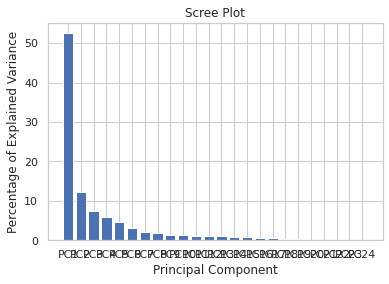

In [61]:
# standardisation of the X. This is essential for PCA.
import sys
import numpy
from sklearn.preprocessing import StandardScaler
numpy.set_printoptions(threshold=False)

hour = end_wkday_a3.columns.tolist()
#scaled_data = preprocessing.scale(start_wkday_b3)

#X = StandardScaler().fit_transform(start_wkday_b3)
#pca = PCA(n_components=24)
#rand_st_int = 10 
pca = PCA()
# fit the components
#pca.fit(X)
#X_new_components = pca.fit_transform(X)

end_wkday_a3[np.isnan(end_wkday_a3)] = 0
pca.fit(end_wkday_a3)
X_new_components = pca.fit_transform(end_wkday_a3)
pca_data = pca.transform(end_wkday_a3)

import matplotlib.pyplot as plt

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [62]:
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

print('Eigenvalues of each component:')
print(pca.explained_variance_)

Explained variance ratio of each component:
[5.24534417e-01 1.22568727e-01 7.43931915e-02 ... 9.39256592e-04
 6.51935438e-04 4.60789871e-33]
Eigenvalues of each component:
[7.83250659e-03 1.83023331e-03 1.11086164e-03 ... 1.40252636e-05
 9.73489717e-06 6.88065375e-35]


In [63]:
PCnames = ['PC'+str(i+1) for i in range(pca.n_components_)]
Loadings = pd.DataFrame(pca.components_.transpose(),columns=PCnames,index=hour)

Loadings.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
0,-0.0503,-0.0110,-0.0537,-0.0546,-0.0564
1,-0.0290,0.0039,-0.0309,-0.0401,-0.0385
2,-0.0163,0.0052,-0.0160,-0.0252,-0.0248
3,-0.0087,-0.0006,-0.0035,-0.0110,-0.0092
4,0.0007,-0.0065,-0.0000,0.0026,-0.0089
5,0.0076,-0.0228,0.0281,-0.0195,0.0221
6,0.0870,-0.1849,0.1051,-0.1712,0.1884
7,0.2938,-0.4893,0.2838,-0.4505,0.4135
8,0.6406,-0.3690,-0.2004,0.4317,-0.4014
9,0.3841,0.5031,-0.3692,0.0968,0.4673


Text(0.5, 1.0, 'PC1(52.45%)')

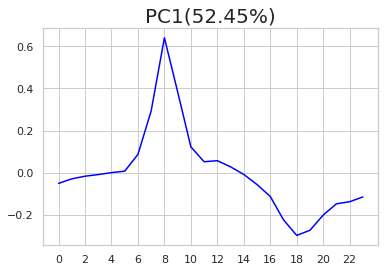

In [65]:
# plt Loadings
Loadings["PC1"].plot(color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC1({:.2f}%)".format(pca.explained_variance_ratio_[0]*100),fontsize=20)  # add title

Text(0.5, 1.0, 'PC2(12.26%)')

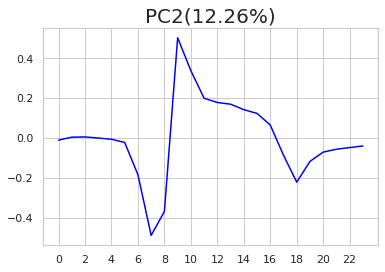

In [66]:
Loadings["PC2"].plot(color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC2({:.2f}%)".format(pca.explained_variance_ratio_[1]*100),fontsize=20)  # add title

Text(0.5, 1.0, 'PC3(7.44%)')

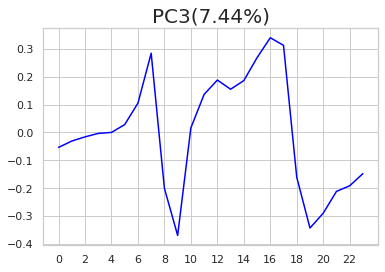

In [67]:
Loadings["PC3"].plot(color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC3({:.2f}%)".format(pca.explained_variance_ratio_[2]*100),fontsize=20)  # add title

Text(0.5, 1.0, 'PC4(5.98%)')

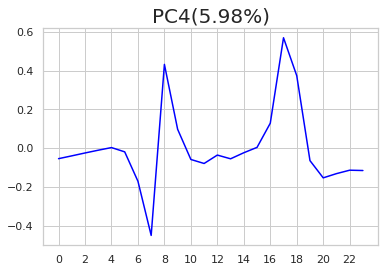

In [68]:
Loadings["PC4"].plot(color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("PC4({:.2f}%)".format(pca.explained_variance_ratio_[3]*100),fontsize=20)  # add title

In [69]:
# ## pc1 vs pc2
station = end_wkday_a3.index.tolist()
pca_df = pd.DataFrame(pca_data, index=station, columns=PCnames)
#pca_df.to_csv("afterpca.csv")

### 6 stations' Top 2 PCs

In [70]:
#pca_df_index_1 = pca_df_index.loc[pca_df_index['index'] == 14]
#pca_df_index_1['PC1']

#KC
pca_df_index_1_pc1 = pca_df.loc[pca_df.index == 14, "PC1"]
pca_df_index_1_pc1 = float("{0:+.2f}".format(pca_df_index_1_pc1.to_list()[0]))
pca_df_index_1_pc1 = "%+.2f" % (pca_df_index_1_pc1)
pca_df_index_1_pc2 = pca_df.loc[pca_df.index == 14, "PC2"]
pca_df_index_1_pc2 = float("{0:+.2f}".format(pca_df_index_1_pc2.to_list()[0]))
pca_df_index_1_pc2 = "%+.2f" % (pca_df_index_1_pc2)

#Waterloo
pca_df_index_2_pc1 = pca_df.loc[pca_df.index == 154, "PC1"]
pca_df_index_2_pc1 = float("{0:+.2f}".format(pca_df_index_2_pc1.to_list()[0]))
pca_df_index_2_pc1 = "%+.2f" % (pca_df_index_2_pc1)
pca_df_index_2_pc2 = pca_df.loc[pca_df.index == 154, "PC2"]
pca_df_index_2_pc2 = float("{0:+.2f}".format(pca_df_index_2_pc2.to_list()[0]))
pca_df_index_2_pc2 = "%+.2f" % (pca_df_index_2_pc2)

#Euston
pca_df_index_3_pc1 = pca_df.loc[pca_df.index == 214, "PC1"]
pca_df_index_3_pc1 = float("{0:+.2f}".format(pca_df_index_3_pc1.to_list()[0]))
pca_df_index_3_pc1 = "%+.2f" % (pca_df_index_3_pc1)
pca_df_index_3_pc2 = pca_df.loc[pca_df.index == 214, "PC2"]
pca_df_index_3_pc2 = float("{0:+.2f}".format(pca_df_index_3_pc2.to_list()[0]))
pca_df_index_3_pc2 = "%+.2f" % (pca_df_index_3_pc2)

#RP
pca_df_index_4_pc1 = pca_df.loc[pca_df.index == 114, "PC1"]
pca_df_index_4_pc1 = float("{0:+.2f}".format(pca_df_index_4_pc1.to_list()[0]))
pca_df_index_4_pc1 = "%+.2f" % (pca_df_index_4_pc1)
pca_df_index_4_pc2 = pca_df.loc[pca_df.index == 114, "PC2"]
pca_df_index_4_pc2 = float("{0:+.2f}".format(pca_df_index_4_pc2.to_list()[0]))
pca_df_index_4_pc2 = "%+.2f" % (pca_df_index_4_pc2)

#Hyde Park
pca_df_index_5_pc1 = pca_df.loc[pca_df.index == 191, "PC1"]
pca_df_index_5_pc1 = float("{0:+.2f}".format(pca_df_index_5_pc1.to_list()[0]))
pca_df_index_5_pc1 = "%+.2f" % (pca_df_index_5_pc1)
pca_df_index_5_pc2 = pca_df.loc[pca_df.index == 191, "PC2"]
pca_df_index_5_pc2 = float("{0:+.2f}".format(pca_df_index_5_pc2.to_list()[0]))
pca_df_index_5_pc2 = "%+.2f" % (pca_df_index_5_pc2)

#QEOP
pca_df_index_6_pc1 = pca_df.loc[pca_df.index == 785, "PC1"]
pca_df_index_6_pc1 = float("{0:+.2f}".format(pca_df_index_6_pc1.to_list()[0]))
pca_df_index_6_pc1 = "%+.2f" % (pca_df_index_6_pc1)
pca_df_index_6_pc2 = pca_df.loc[pca_df.index == 785, "PC2"]
pca_df_index_6_pc2 = float("{0:+.2f}".format(pca_df_index_6_pc2.to_list()[0]))
pca_df_index_6_pc2 = "%+.2f" % (pca_df_index_6_pc2)


### Reconstructed 6 Stations

In [71]:
import numpy as np
import sklearn.datasets, sklearn.decomposition

mu = np.mean(end_wkday_a3, axis=0)

pca_r = sklearn.decomposition.PCA()
pca_r.fit(end_wkday_a3)

nComp = 2
Xhat = np.dot(pca_r.transform(end_wkday_a3)[:,:nComp], pca_r.components_[:nComp,:])
Xhat += mu

print(Xhat[14,])
print(Xhat[14,])

[0.00742035 0.0054565  0.00354897 ... 0.02301276 0.01956677 0.01507238]
[0.00742035 0.0054565  0.00354897 ... 0.02301276 0.01956677 0.01507238]


#### Belgrove Street, King's Cross

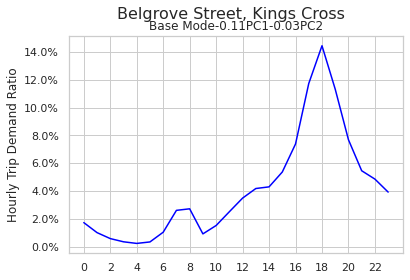

In [72]:
plt.plot(Xhat[13,], color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_1_pc1)+'PC1'+str(pca_df_index_1_pc2)+'PC2', fontsize = 12)
plt.suptitle('Belgrove Street, Kings Cross', fontsize = 16)
plt.show()

#### Waterloo Station 3

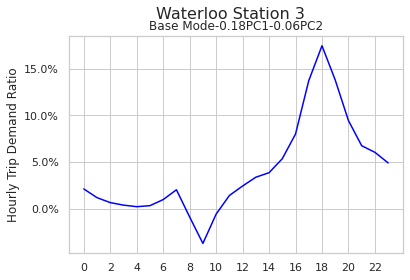

In [73]:
plt.plot(Xhat[144,], color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_2_pc1)+'PC1'+str(pca_df_index_2_pc2)+'PC2', fontsize = 12)
plt.suptitle('Waterloo Station 3', fontsize = 16)
plt.show()

#### Endsleigh Garden, Euston

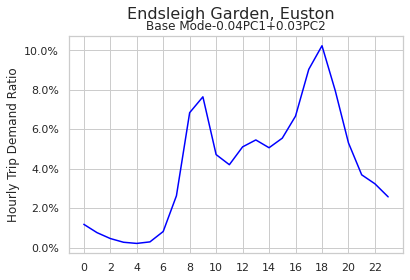

In [74]:
plt.plot(Xhat[191,], color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_3_pc1)+'PC1'+str(pca_df_index_3_pc2)+'PC2', fontsize = 12)
plt.suptitle('Endsleigh Garden, Euston', fontsize = 16)
plt.show()

#### Park Road(Baker Street), The Regent Park

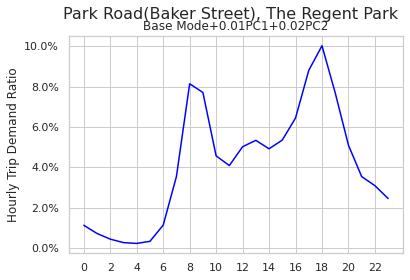

In [75]:
plt.plot(Xhat[106,], color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_4_pc1)+'PC1'+str(pca_df_index_4_pc2)+'PC2', fontsize = 12)
plt.suptitle('Park Road(Baker Street), The Regent Park', fontsize = 16)
plt.show()

#### Hyde Park Corner

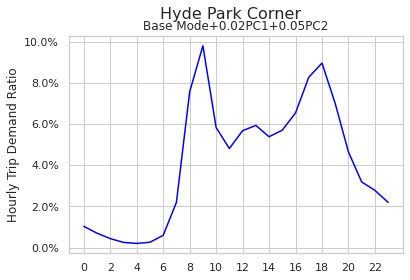

In [76]:
plt.plot(Xhat[178,], color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_5_pc1)+'PC1'+str(pca_df_index_5_pc2)+'PC2', fontsize = 12)
plt.suptitle('Hyde Park Corner', fontsize = 16)
plt.show()

#### Aquatic Centre, Queen Elizabeth Olympic Park

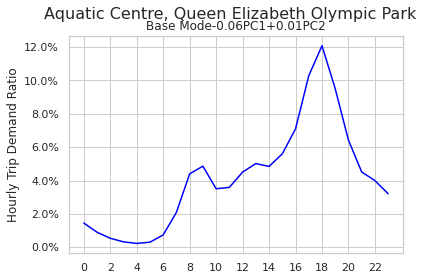

In [77]:
plt.plot(Xhat[734,], color = 'blue')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Hourly Trip Demand Ratio')

plt.title('Base Mode' + str(pca_df_index_6_pc1)+'PC1'+str(pca_df_index_6_pc2)+'PC2', fontsize = 12)
plt.suptitle('Aquatic Centre, Queen Elizabeth Olympic Park', fontsize = 16)
plt.show()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


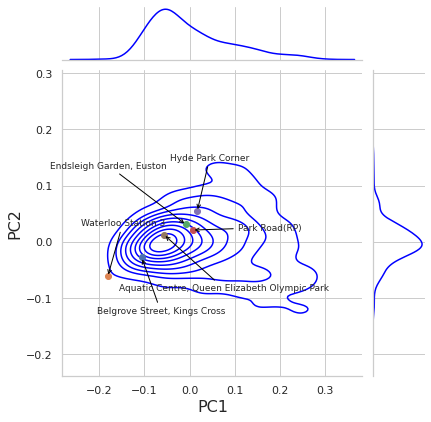

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

pca_df_1_2 = pca_df[['PC1','PC2']]

ind_list = [13,144,191,106,178,734]
pp = pca_df_1_2.iloc[ind_list]
n = ['Belgrove Street, Kings Cross', 'Waterloo Station 3', 'Endsleigh Garden, Euston', 'Park Road(RP)', 'Hyde Park Corner','Aquatic Centre, Queen Elizabeth Olympic Park']
pp['col'] = n

ind_list2 = [144,178]
pp2 = pca_df_1_2.iloc[ind_list2]
n2 = [ 'Waterloo Station 3', 'Hyde Park Corner']
pp2['col'] = n2

ind_list3 = [13,734]
pp3 = pca_df_1_2.iloc[ind_list3]
n3 = ['Belgrove Street, Kings Cross','Aquatic Centre, Queen Elizabeth Olympic Park']
pp3['col'] = n3

ind_list4 = [191]
pp4 = pca_df_1_2.iloc[ind_list4]
n4 = ['Endsleigh Garden, Euston']
pp4['col'] = n4

ind_list5 = [106]
pp5 = pca_df_1_2.iloc[ind_list5]
n5 = ['Park Road(RP)']
pp5['col'] = n5

# loading dataset
#color = sns.color_palette()[3]
# draw jointplot with
# kde kind
sns.set(style="whitegrid")
pca_df_1_2 = pca_df[['PC1','PC2']]
g = sns.jointplot(x = "PC1", y = "PC2",
              kind = "kde",data = pca_df_1_2,color ='blue')
for i,row in enumerate(pp.values):
    g.ax_joint.plot(row[0], row[1] ,marker='o')

for i, txt in enumerate(pp2.values):
    #g.ax_joint.annotate(txt[2],(txt[0],txt[1]),fontsize=7)
    g.ax_joint.annotate(txt[2], xy=(txt[0], txt[1]), xytext=(txt[0]-0.06, txt[1]+0.09), arrowprops={"arrowstyle":"->", "color":"black"},fontsize=12)
for i, txt in enumerate(pp3.values):
    #g.ax_joint.annotate(txt[2],(txt[0],txt[1]),fontsize=7)
    g.ax_joint.annotate(txt[2], xy=(txt[0], txt[1]), xytext=(txt[0]-0.1, txt[1]-0.1), arrowprops={"arrowstyle":"->", "color":"black"},fontsize=9)
for i, txt in enumerate(pp4.values):
    #g.ax_joint.annotate(txt[2],(txt[0],txt[1]),fontsize=7)
    g.ax_joint.annotate(txt[2], xy=(txt[0], txt[1]), xytext=(txt[0]-0.3, txt[1]+0.1), arrowprops={"arrowstyle":"->", "color":"black"},fontsize=9)
for i, txt in enumerate(pp5.values):
    #g.ax_joint.annotate(txt[2],(txt[0],txt[1]),fontsize=7)
    g.ax_joint.annotate(txt[2], xy=(txt[0], txt[1]), xytext=(txt[0]+0.1, txt[1]), arrowprops={"arrowstyle":"->", "color":"black"},fontsize=9)
    
    
g.set_axis_labels('PC1', 'PC2', fontsize=16)

plt.show()